In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df=pd.read_csv('../train.csv')

In [65]:
df.head()

ID             Candidate        Constituency ∇ Party  Criminal Case  \
0   0            M.K. Mohan            ANNA NAGAR   DMK              4   
1   1  Khatik Ramesh Prasad           KARERA (SC)   BJP              0   
2   2      Dr. Mantar Gowda              MADIKERI   INC              0   
3   3          Kundan Kumar             BEGUSARAI   BJP              0   
4   4       Swapan Majumder  BANGAON DAKSHIN (SC)   BJP              2   

  Total Assets Liabilities           state      Education  
0   211 Crore+    2 Crore+      TAMIL NADU       8th Pass  
1     1 Crore+           0  MADHYA PRADESH      12th Pass  
2     7 Crore+     22 Lac+       KARNATAKA  Post Graduate  
3     9 Crore+     24 Lac+           BIHAR  Post Graduate  
4     2 Crore+     61 Lac+     WEST BENGAL       8th Pass

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              2059 non-null   int64 
 1   Candidate       2059 non-null   object
 2   Constituency ∇  2059 non-null   object
 3   Party           2059 non-null   object
 4   Criminal Case   2059 non-null   int64 
 5   Total Assets    2059 non-null   object
 6   Liabilities     2059 non-null   object
 7   state           2059 non-null   object
 8   Education       2059 non-null   object
dtypes: int64(2), object(7)
memory usage: 144.9+ KB


In [67]:
def convert_to_numeric(value):
    if isinstance(value, str):
        if 'Crore' in value:
            numeric_value = float(value.replace(' Crore+', '')) * 10000000
        elif 'Lac' in value:
            numeric_value = float(value.replace(' Lac+', '')) * 100000
        elif 'Thou' in value:
            numeric_value = float(value.replace(' Thou+', '')) * 1000
        elif 'Hund' in value:
            numeric_value = float(value.replace(' Hund+', '')) * 100
        else:
            numeric_value = float(value)
    else:
        numeric_value = float(value)
    return numeric_value

In [68]:
df['Total Assets'] = df['Total Assets'].apply(convert_to_numeric)
df['Liabilities'] = df['Liabilities'].apply(convert_to_numeric)
df['Net Income'] = df['Total Assets'] - df['Liabilities']

## ANALYSIS OF BEHAVIOUR OF CRIMINAL CASES ACROSS DIFFERENT POLITICAL PARTIES

In [69]:
mean_criminal_cases = df['Criminal Case'].mean()
print('mean criminal cases : ', mean_criminal_cases)

mean criminal cases :  1.7775619232637203


### PERCENTAGE OF MEMBERS OF A POLITICAL PARTY THAT HAVE CRIMINAL CASE RECORD GREATER THAN THE MEAN NO. OF CRIMINAL CASES

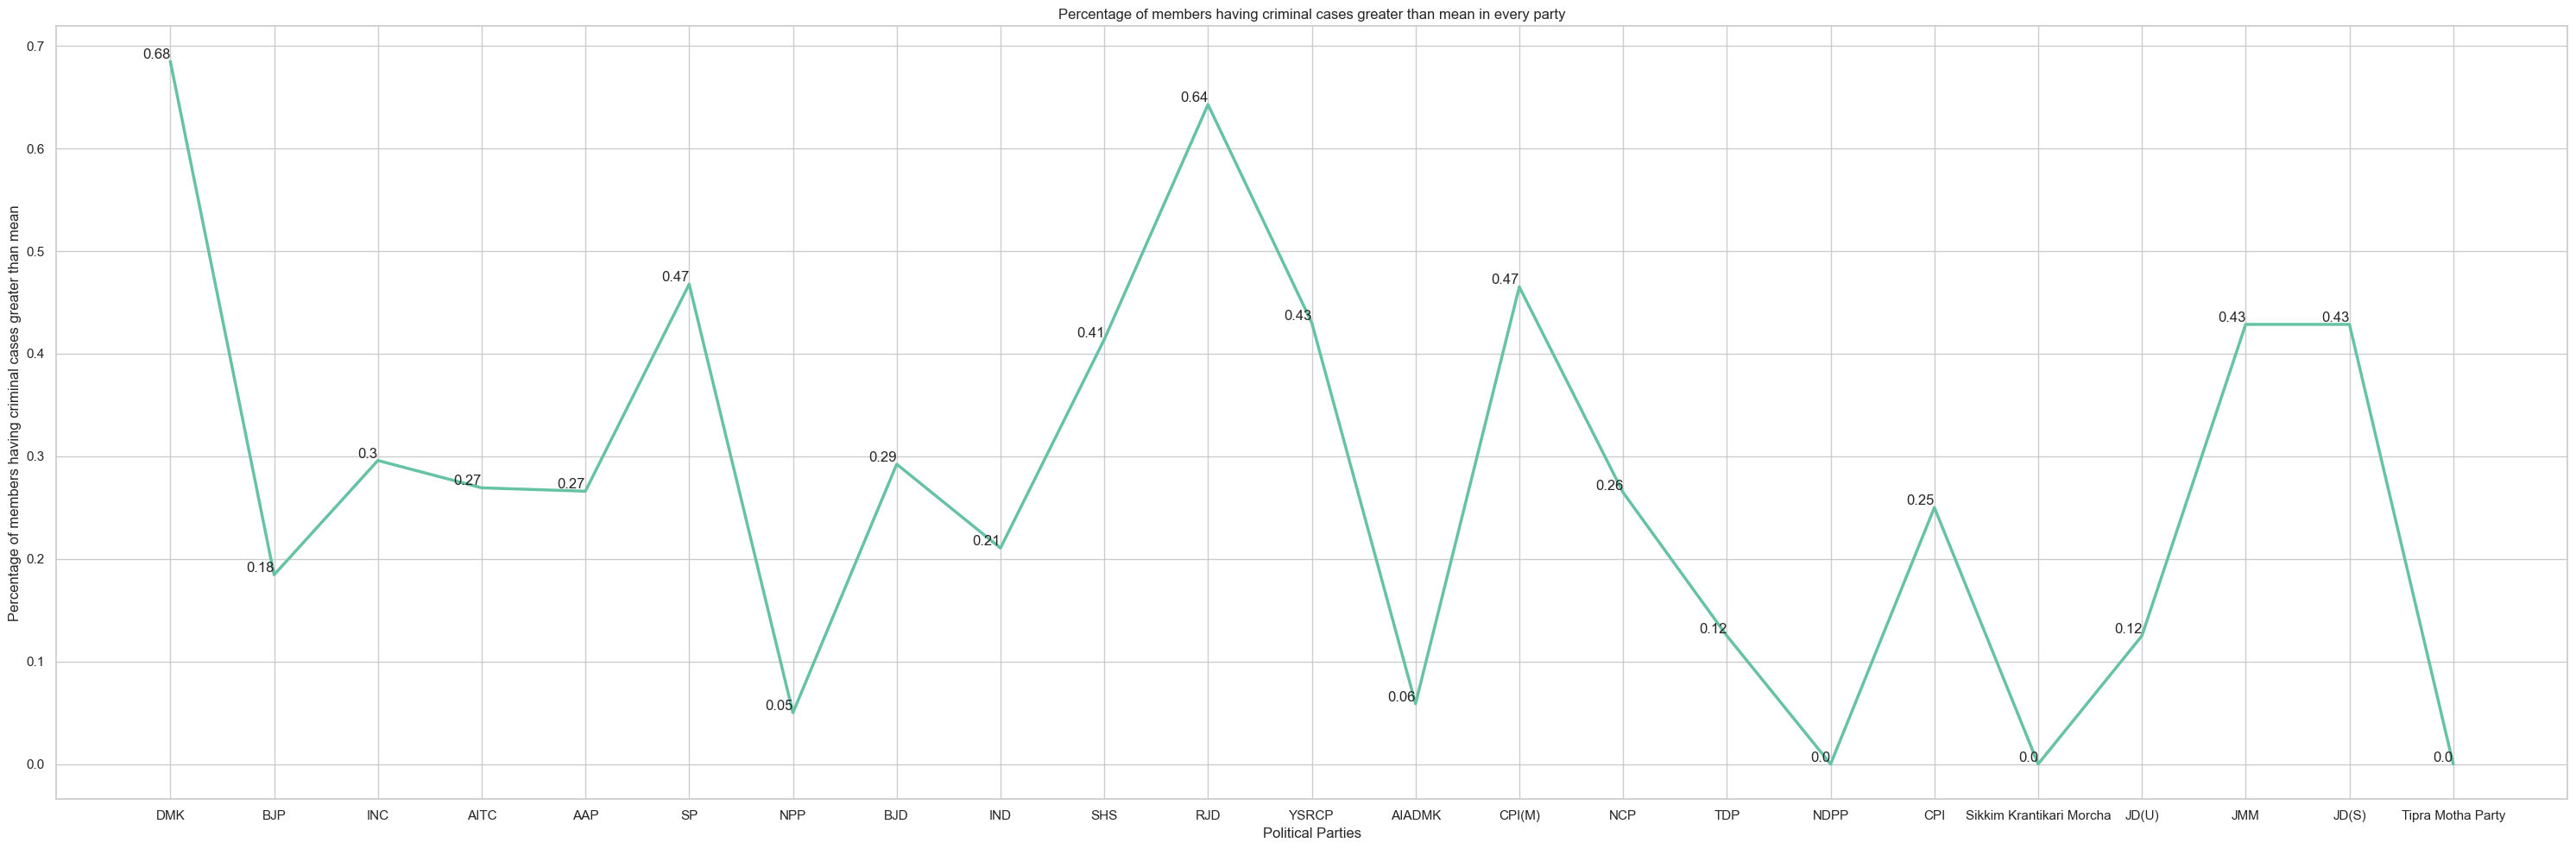

In [70]:
x=df['Party'].unique()
y=[]
for party in x:
    value=0
    for i in range(len(df)):
        if df['Party'][i]==party and df['Criminal Case'][i]>mean_criminal_cases:
            value+=1
    value/=len(df[df['Party']==party])
    y.append(value)
plt.figure(figsize=(30,10))
sns.lineplot(x=x,y=y, linewidth=2.5)
for i, txt in enumerate(y):
    plt.text(x[i], txt, str(round(txt,2)), ha='right', va='bottom')
plt.xlabel('Political Parties')
plt.ylabel('Percentage of members having criminal cases greater than mean')
plt.title('Percentage of members having criminal cases greater than mean in every party')
plt.tight_layout()
plt.savefig('Percentage of members having criminal cases greater than mean in every party.png')
plt.show()

### PERCENTAGE OF MEMBERS OF A POLITICAL PARTY THAT HAVE CRIMINAL CASE RECORD GREATER THAN THE MEAN W.R.T. ALL THE CANDIDATES ACROSS ALL POLITICAL PARTIES

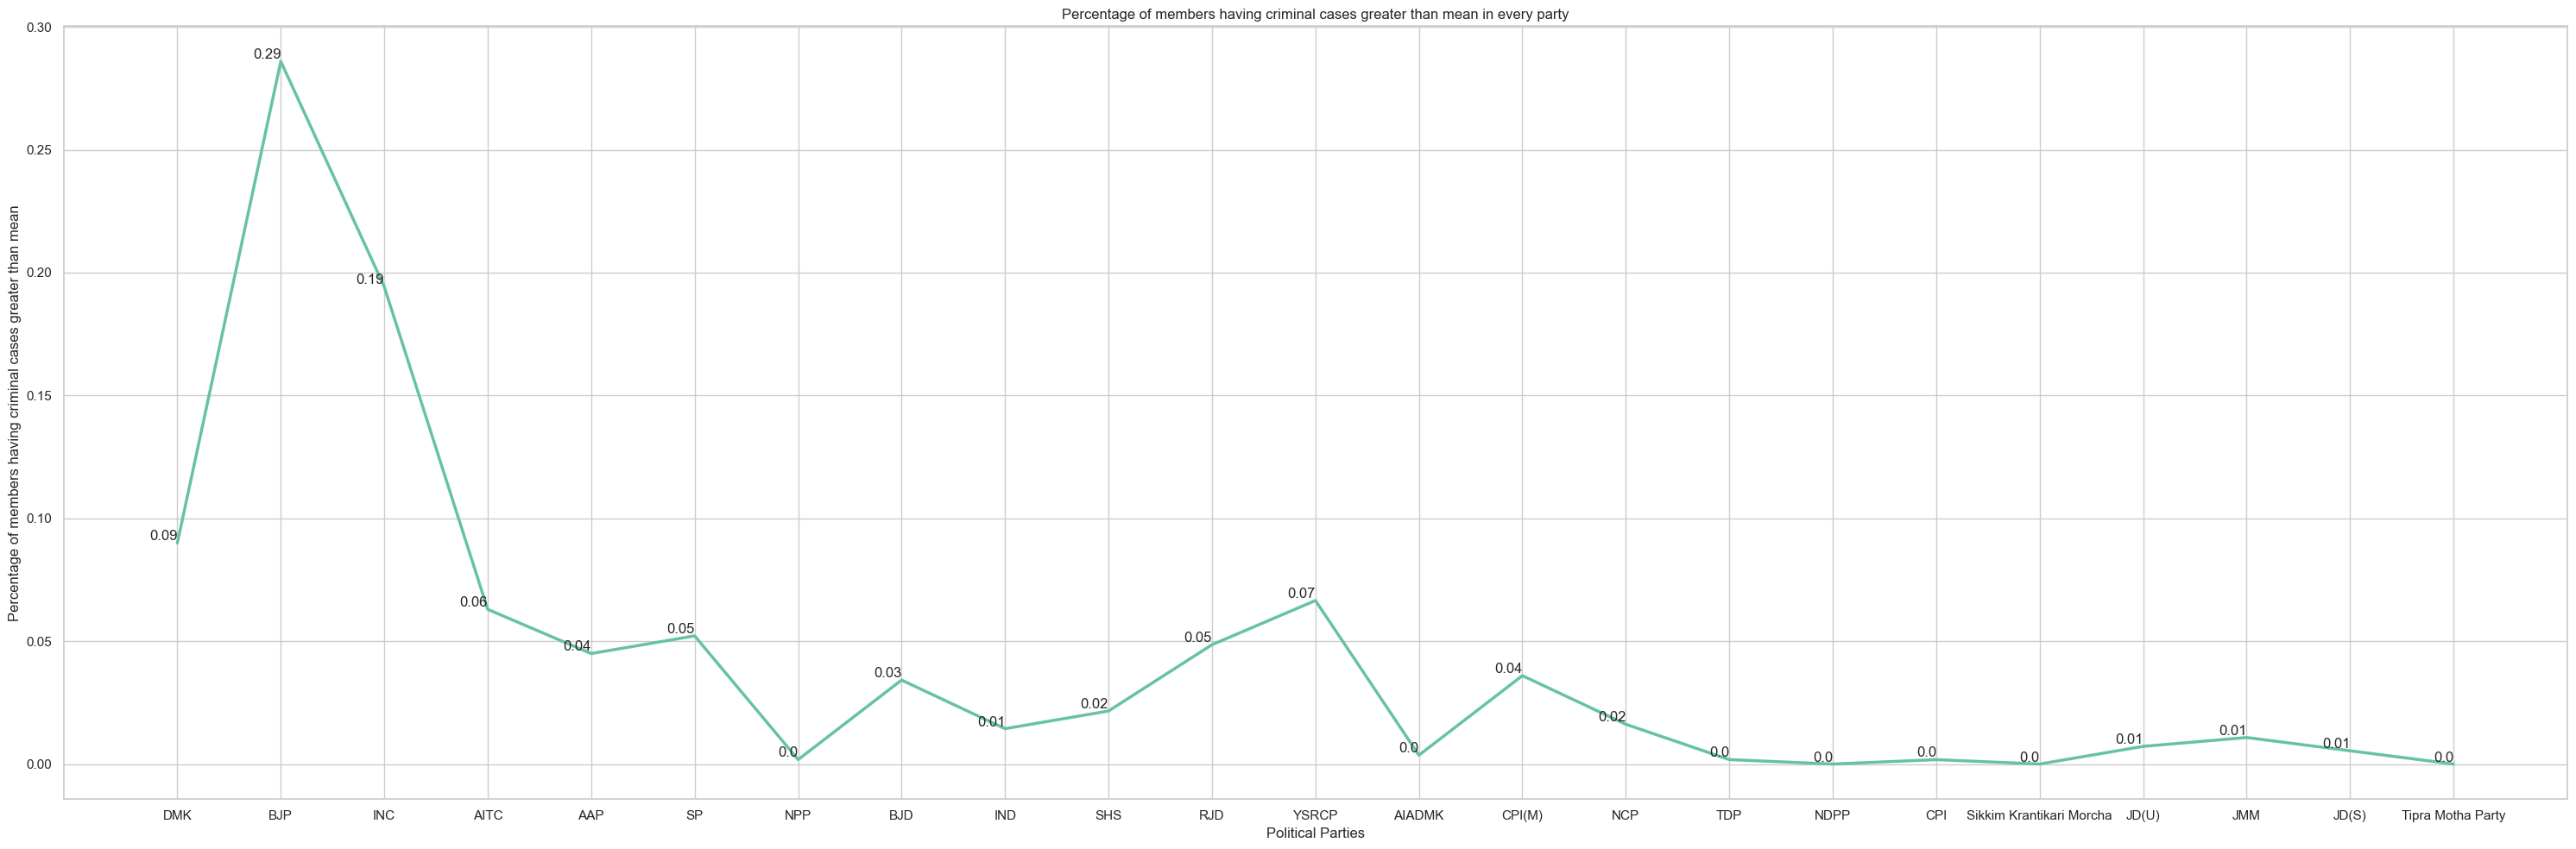

In [71]:
x=df['Party'].unique()
y=[]
for party in x:
    value=0
    for i in range(len(df)):
        if df['Party'][i]==party and df['Criminal Case'][i]>mean_criminal_cases:
            value+=1
    value/=len(df[df['Criminal Case']>mean_criminal_cases])
    y.append(value)
plt.figure(figsize=(30,10))
sns.lineplot(x=x,y=y, linewidth=2.5)
for i, txt in enumerate(y):
    plt.text(x[i], txt, str(round(txt,2)), ha='right', va='bottom')
plt.xlabel('Political Parties')
plt.ylabel('Percentage of members having criminal cases greater than mean')
plt.title('Percentage of members having criminal cases greater than mean in every party')
plt.tight_layout()
plt.savefig('Percentage of members having criminal cases greater than mean in every party w.r.t. all the candidates across all political parties.png')
plt.show()

### CATPLOT TO SHOWCASE THE CRIMINAL CASE RECORDS FOR ALL CANDIDADTES IN ALL POLITICAL PARTIES WITH STATE HUE

/Users/aditikhandelia/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 73.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/aditikhandelia/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 46.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/aditikhandelia/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/aditikhandelia/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/aditikhandelia/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: U

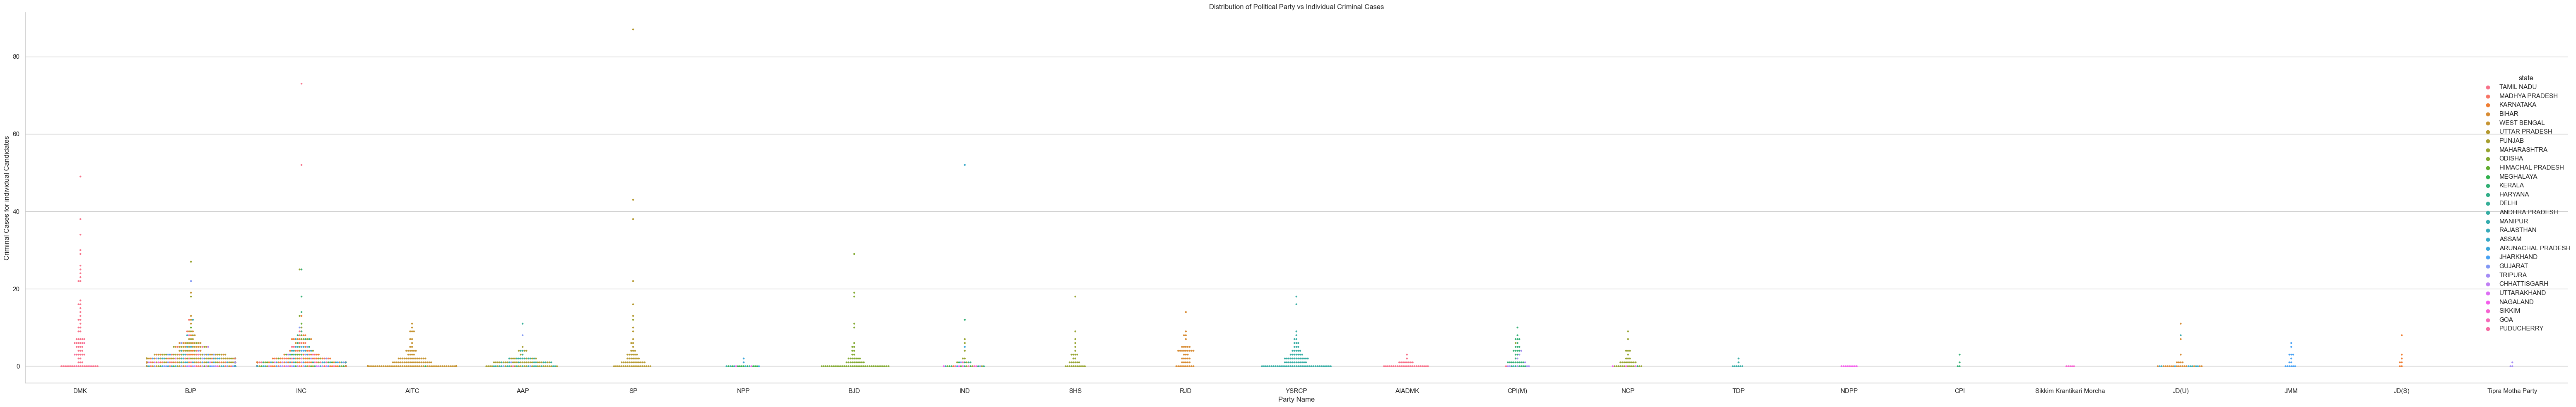

In [72]:
plot=sns.catplot(data=df, x='Party', y='Criminal Case', aspect=6, height=10, s=10,hue='state', kind="swarm")
plot.set_axis_labels('Party Name','Criminal Cases for individual Candidates')
plt.subplots_adjust(top=0.9) 
plt.title('Distribution of Political Party vs Individual Criminal Cases')
plt.tight_layout()
plt.savefig('./Distribution of Political Party vs Individual Criminal Cases catplot state hue.jpg',format='jpeg')
plt.show()

### LINE PLOT TO SHOWCASE THE SUM OF CRIMINAL CASE RECORD FOR ALL CANDIDATES OF ALL POLITICAL PARTIES

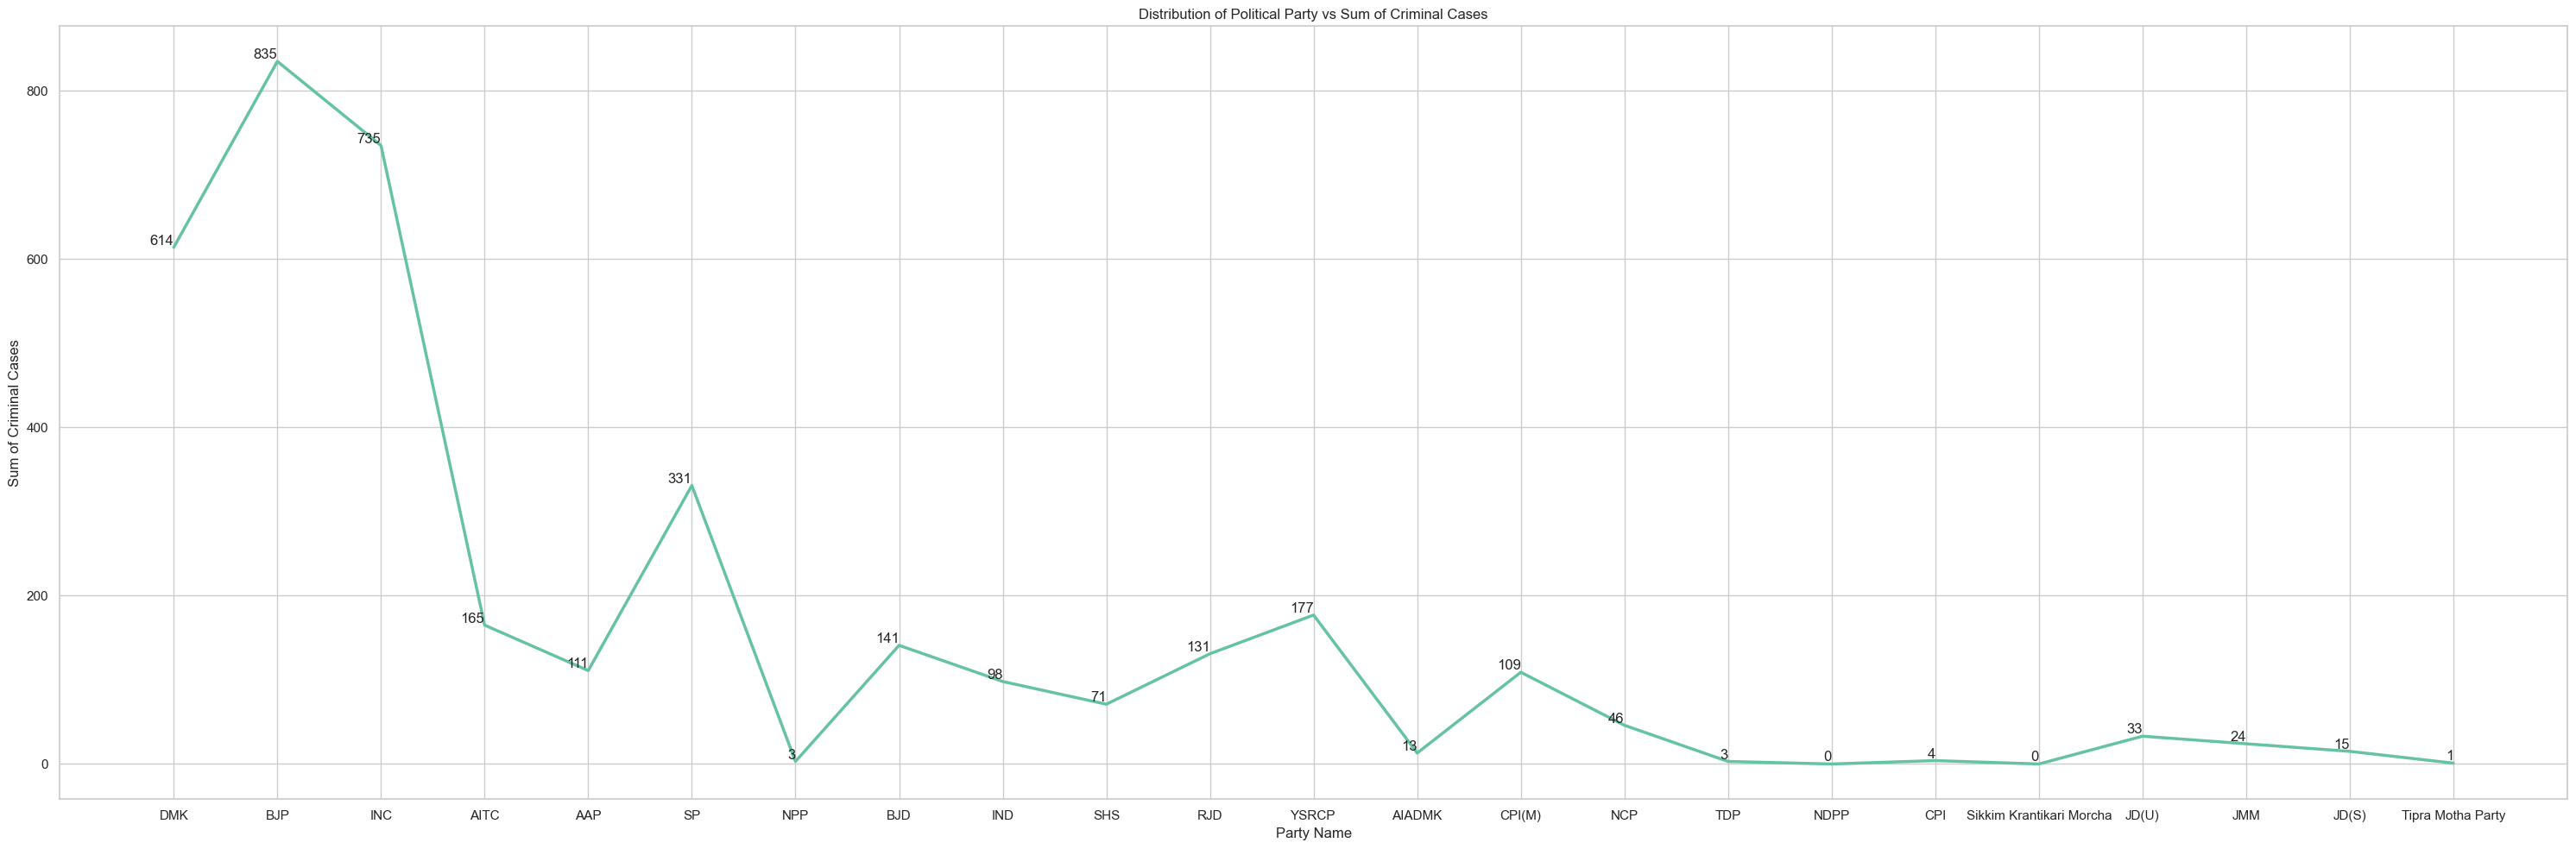

In [73]:
x=[]
y=[]
for party_name in df['Party'].unique():
    x.append(party_name)
    y.append(df[df['Party']==party_name]['Criminal Case'].sum())
plt.figure(figsize=(30,10))
sns.lineplot(x=x,y=y,linewidth=2.5, sizes=30)
for i, txt in enumerate(y):
    plt.text(x[i], txt, str(txt), ha='right', va='bottom')
plt.xlabel('Party Name')
plt.ylabel('Sum of Criminal Cases')
plt.title('Distribution of Political Party vs Sum of Criminal Cases')
plt.tight_layout()
plt.savefig('./Distribution of Political Party vs Sum of Criminal Cases line.jpg',format='jpeg')
plt.show()

### LINE PLOT TO SHOWCASE THE MEAN CRIMINAL CASE RECORD FOR EACH POLITICAL PARTY, WITH MARGINS DENOTING THE MAX AND MIN NO OF CRIMINAL CASES

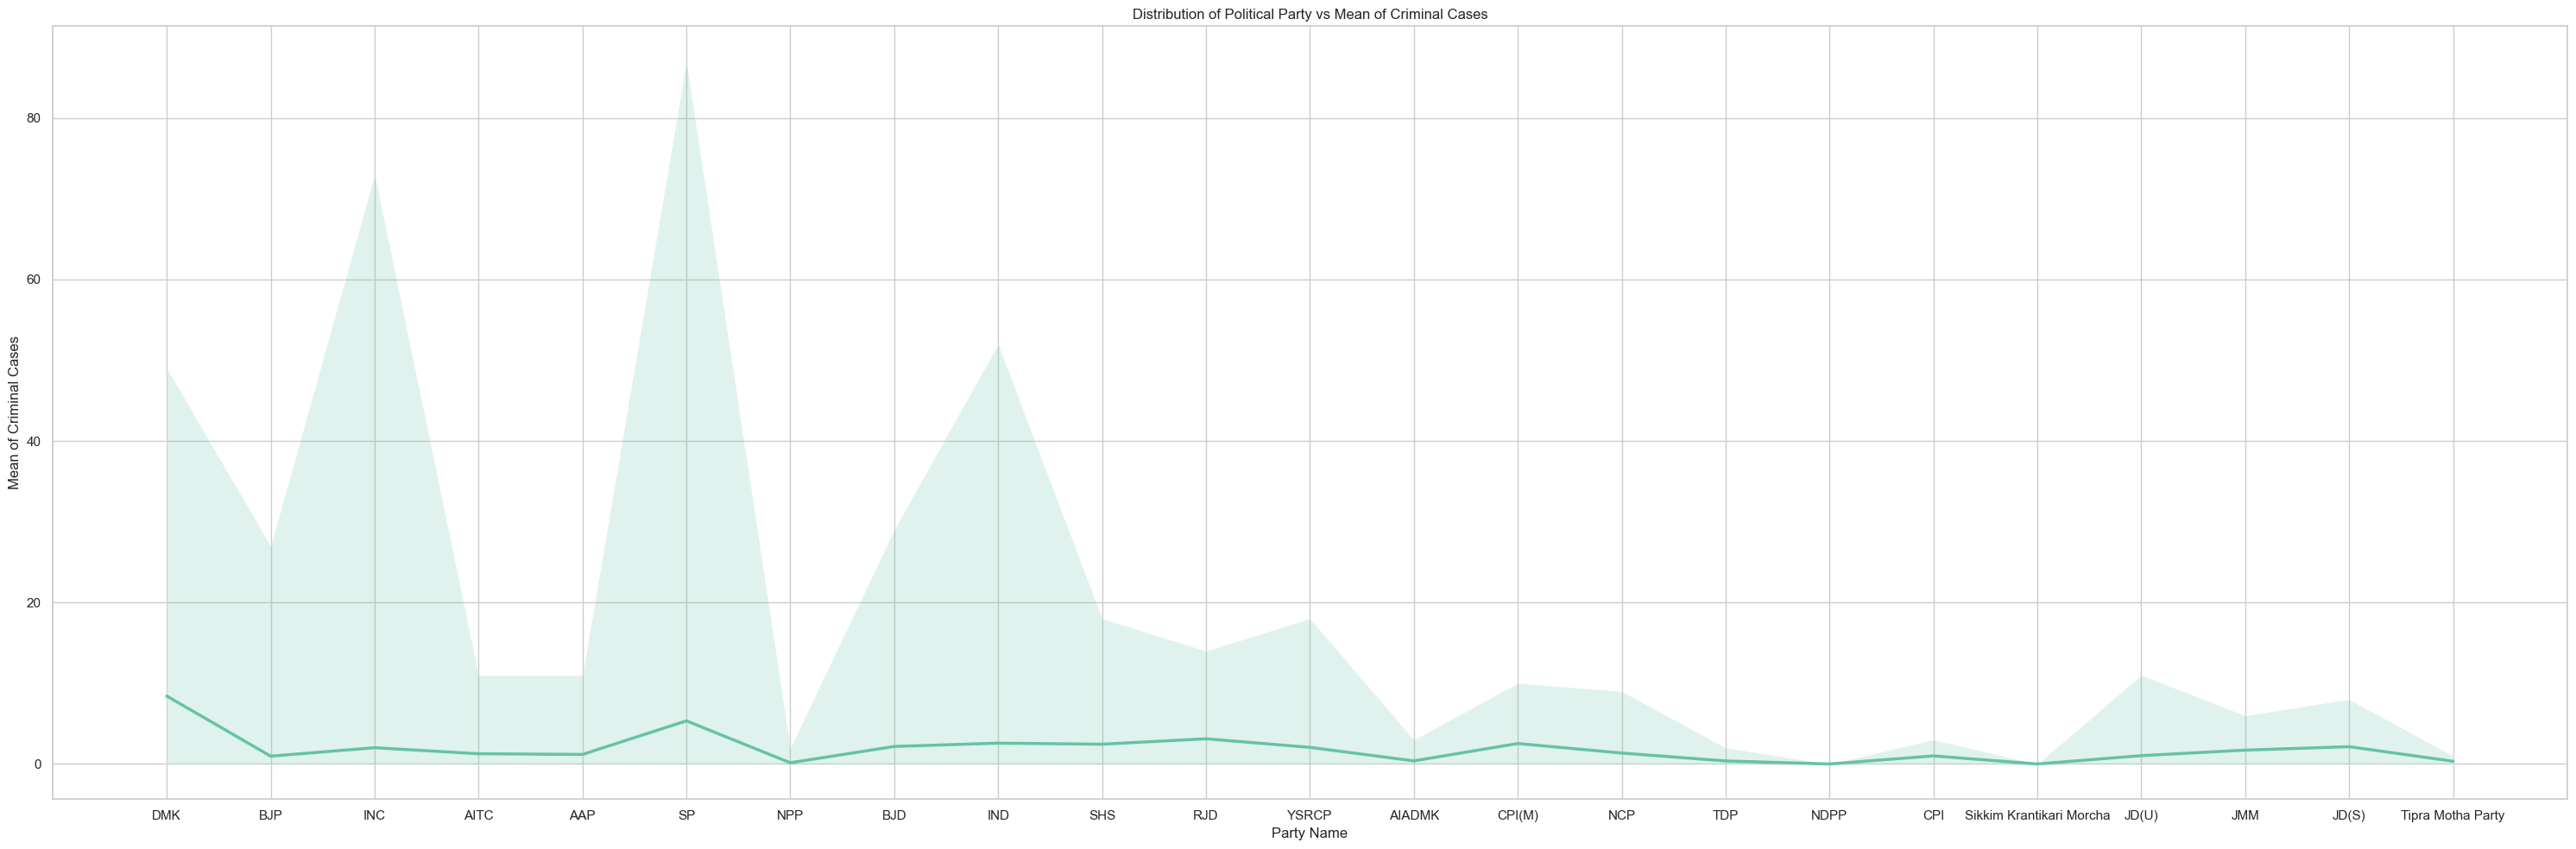

In [74]:
x=[]
y=[]
min_y=[]
max_y=[]
for party_name in df['Party'].unique():
    x.append(party_name)
    y.append(df[df['Party']==party_name]['Criminal Case'].mean())
    min_y.append(df[df['Party']==party_name]['Criminal Case'].min())
    max_y.append(df[df['Party']==party_name]['Criminal Case'].max())
plt.figure(figsize=(30,10))
sns.lineplot(x=x,y=y,linewidth=2.5, sizes=30)
plt.fill_between(x, min_y, max_y, alpha=0.2)
plt.xlabel('Party Name')
plt.ylabel('Mean of Criminal Cases')
plt.title('Distribution of Political Party vs Mean of Criminal Cases')
plt.tight_layout()
plt.savefig('./Distribution of Political Party vs Mean of Criminal Cases line.jpg',format='jpeg')
plt.show()

## ANALYSIS OF BEHAVIOUR OF TOTAL ASSETS ACROSS DIFFERENT POLITICAL PARTIES

In [75]:
mean_total_assets = df['Total Assets'].mean()
print('The mean of total assets is : ',mean_total_assets)

The mean of total assets is :  115599132.1029626


### PERCENTAGE OF MEMBERS OF A POLITICAL PARTY THAT HAVE CRIMINAL CASE RECORD GREATER THAN THE MEAN NO. OF TOTAL ASSETS

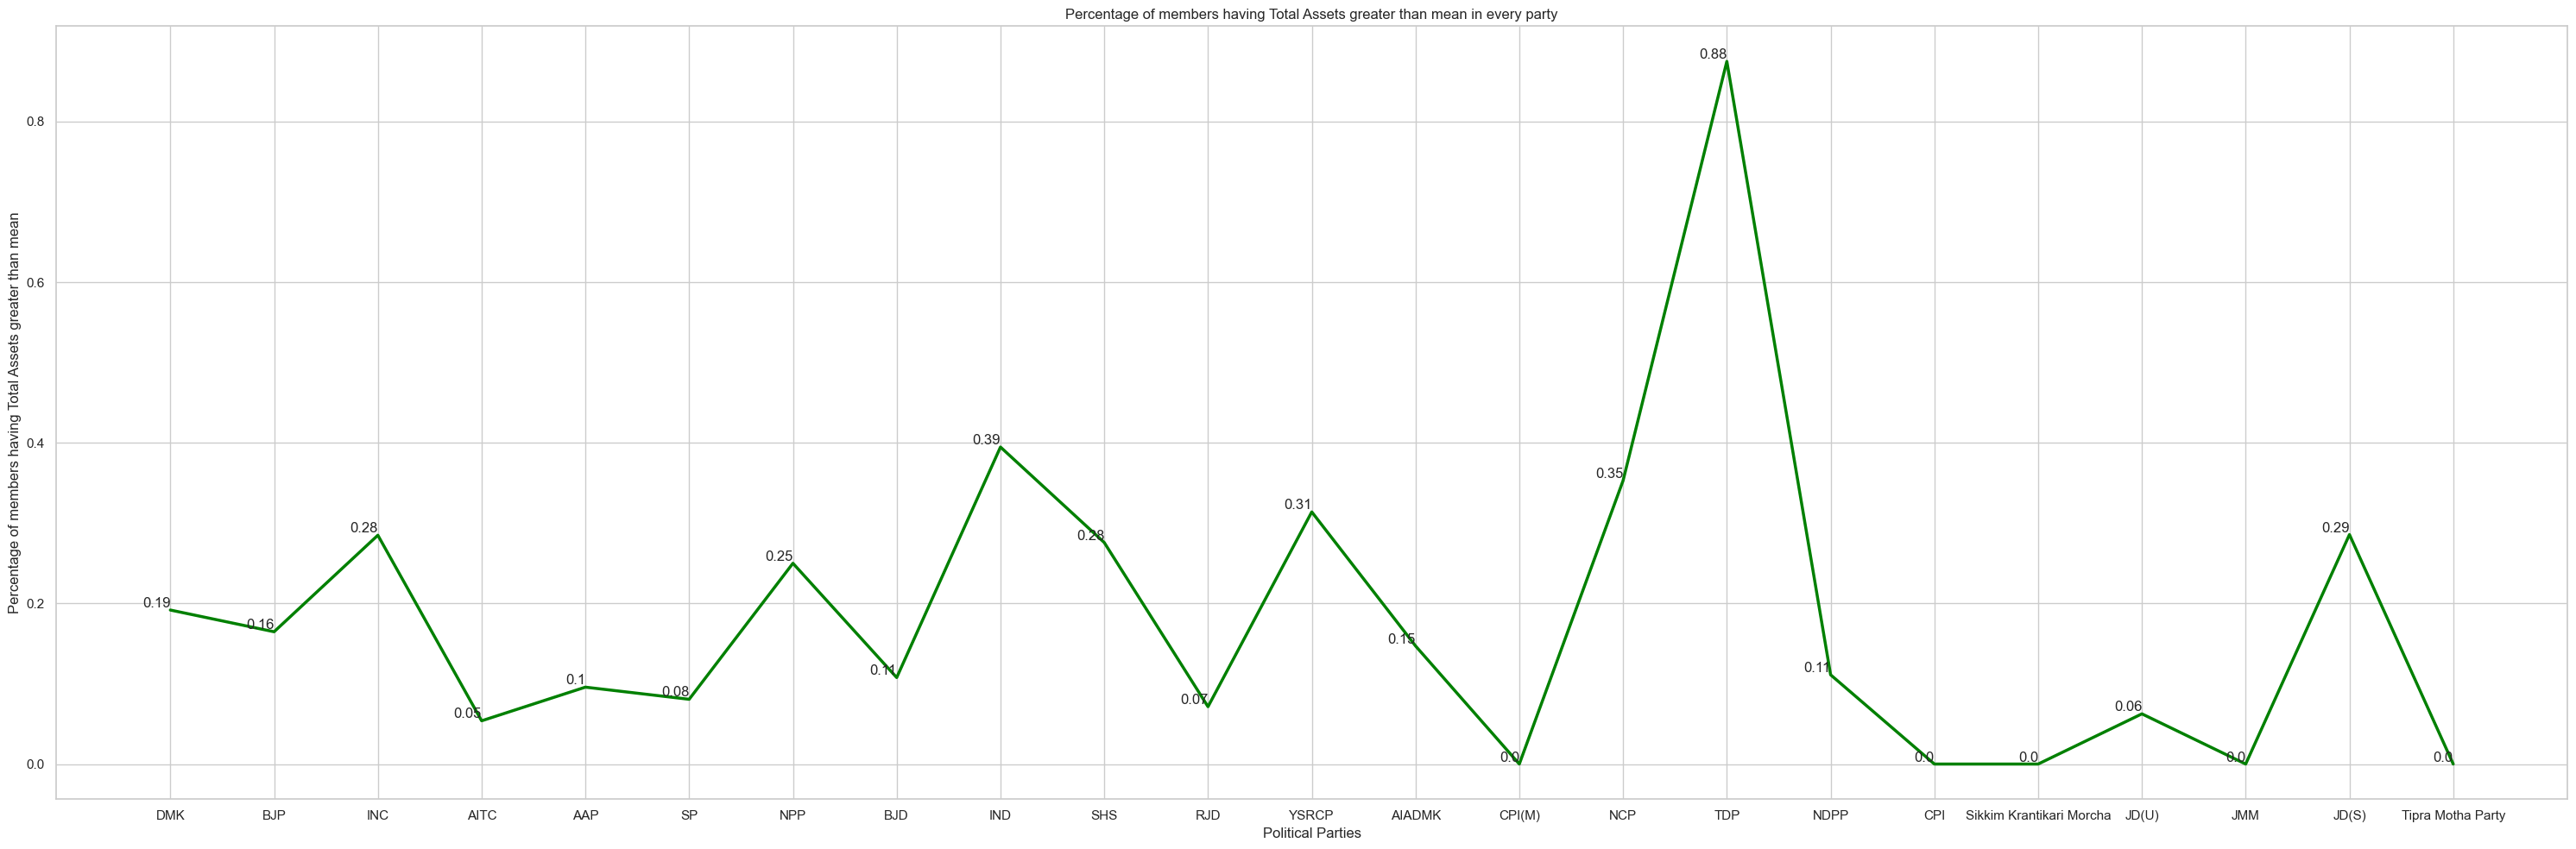

In [76]:
x=df['Party'].unique()
y=[]
for party in x:
    value=0
    for i in range(len(df)):
        if df['Party'][i]==party and df['Total Assets'][i]>mean_total_assets:
            value+=1
    value/=len(df[df['Party']==party])
    y.append(value)
plt.figure(figsize=(30,10))
sns.lineplot(x=x,y=y, linewidth=2.5, color='green')
for i, txt in enumerate(y):
    plt.text(x[i], txt, str(round(txt,2)), ha='right', va='bottom')
plt.xlabel('Political Parties')
plt.ylabel('Percentage of members having Total Assets greater than mean')
plt.title('Percentage of members having Total Assets greater than mean in every party')
plt.tight_layout()
plt.savefig('Percentage of members having Total Assets greater than mean in every party.png')
plt.show()

### PERCENTAGE OF MEMBERS OF A POLITICAL PARTY THAT HAVE TOTAL ASSETS GREATER THAN THE MEAN W.R.T. ALL THE CANDIDATES ACROSS ALL POLITICAL PARTIES

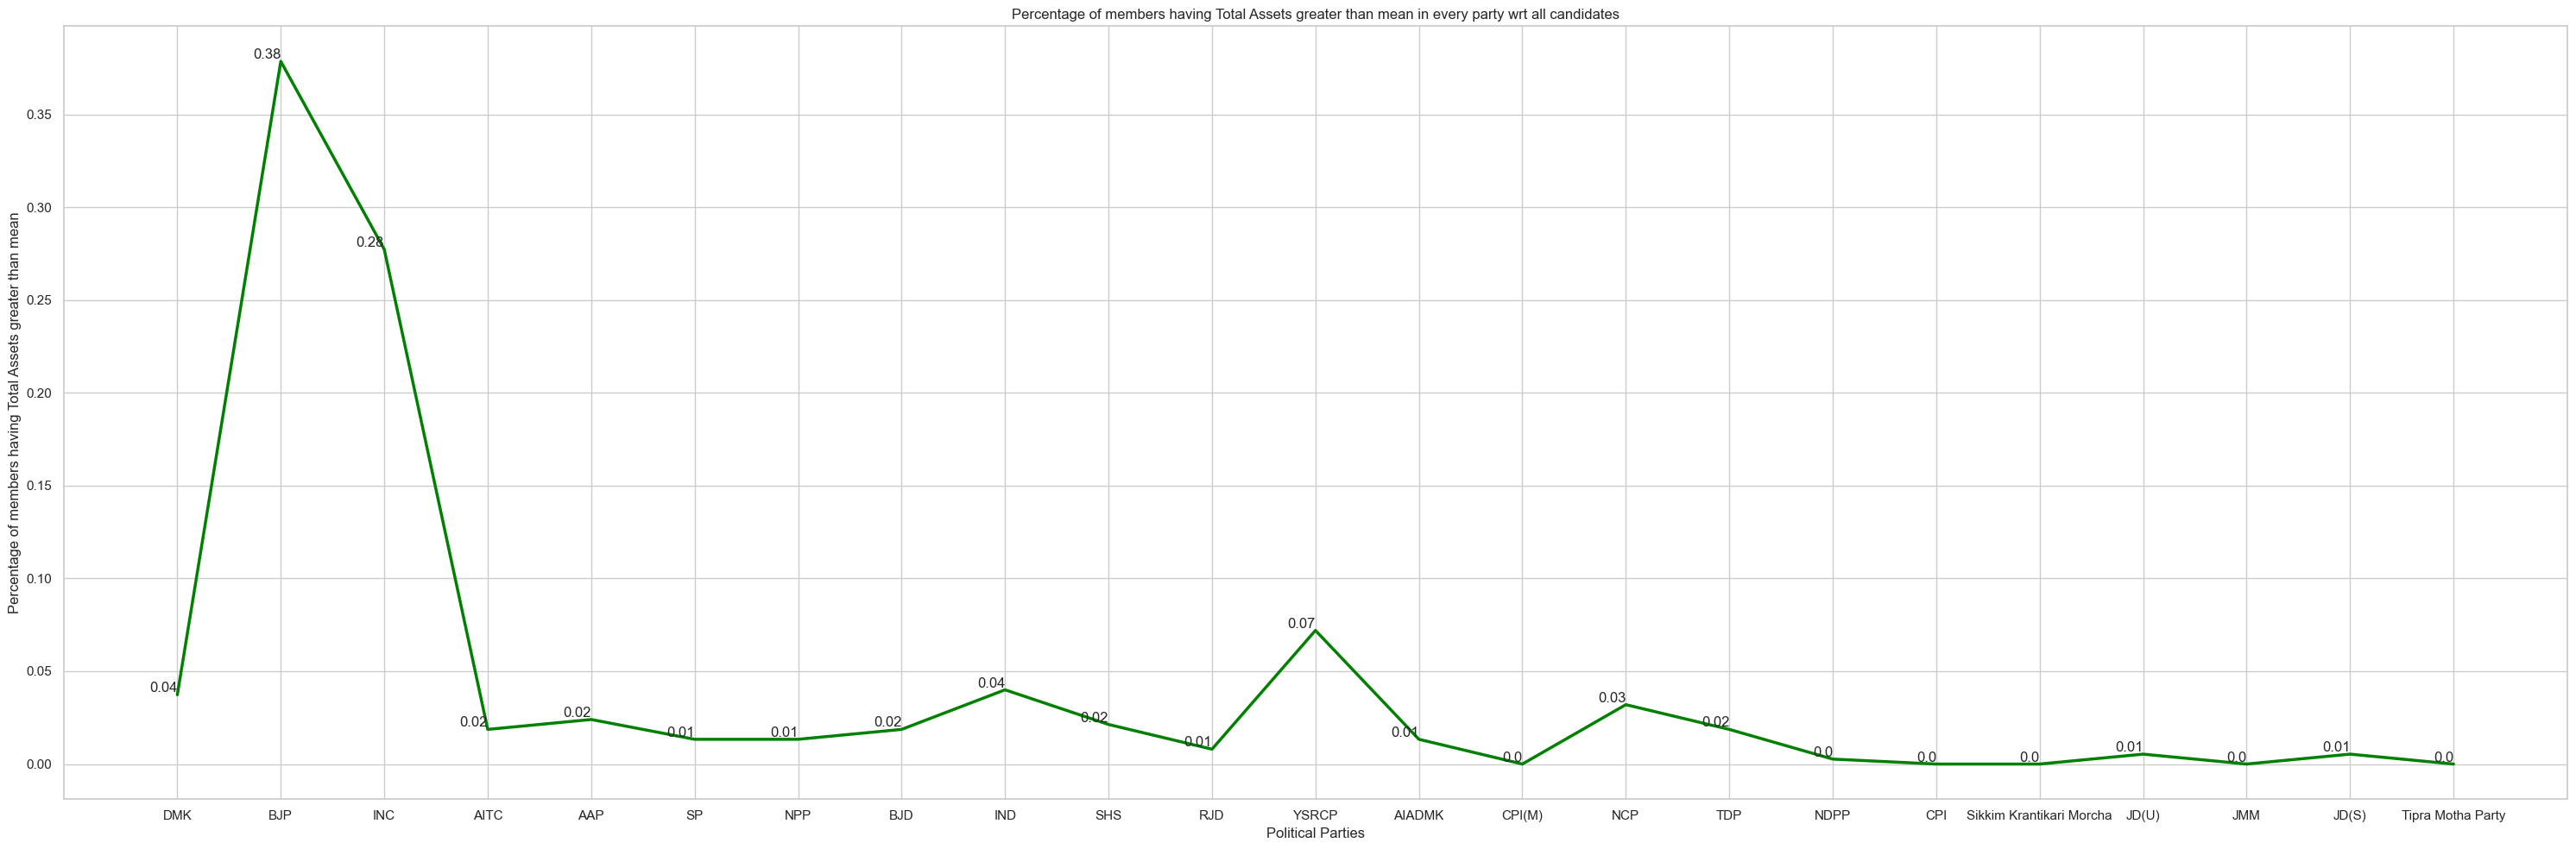

In [77]:
x=df['Party'].unique()
y=[]
for party in x:
    value=0
    for i in range(len(df)):
        if df['Party'][i]==party and df['Total Assets'][i]>mean_total_assets:
            value+=1
    value/=len(df[df['Total Assets']>mean_total_assets])
    y.append(value)
plt.figure(figsize=(30,10))
sns.lineplot(x=x,y=y, linewidth=2.5, color='green')
for i, txt in enumerate(y):
    plt.text(x[i], txt, str(round(txt,2)), ha='right', va='bottom')
plt.xlabel('Political Parties')
plt.ylabel('Percentage of members having Total Assets greater than mean')
plt.title('Percentage of members having Total Assets greater than mean in every party wrt all candidates')
plt.tight_layout()
plt.savefig('Percentage of members having Total Assets greater than mean in every party wrt all parties.png')
plt.show()

### CATPLOT TO SHOWCASE THE TOTAL ASSETS FOR ALL CANDIDADTES IN ALL POLITICAL PARTIES WITH STATE HUE

/Users/aditikhandelia/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 74.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/aditikhandelia/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 48.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/aditikhandelia/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 52.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/aditikhandelia/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 36.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/aditikhandelia/anaconda3/

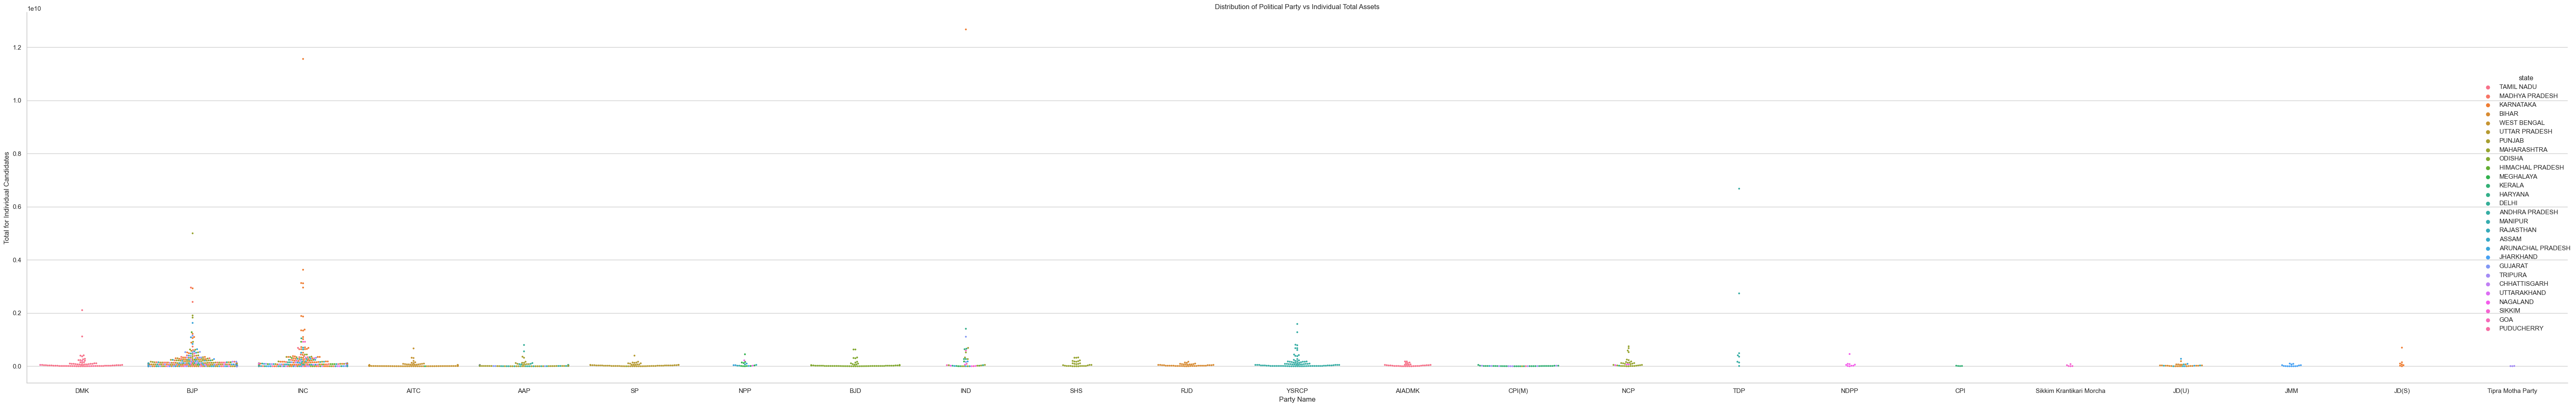

In [78]:
plot=sns.catplot(data=df, x='Party', y='Total Assets', height=10, aspect=6, s=10,hue='state', kind="swarm")
plot.set_axis_labels('Party Name','Total for Individual Candidates')
plt.subplots_adjust(top=0.9) 
plt.title('Distribution of Political Party vs Individual Total Assets')
plt.tight_layout()
plt.savefig('./Distribution of Political Party vs Individual Total Assets catplot state hue.jpg',format='jpeg')
plt.show()

### LINE PLOT TO SHOWCASE THE SUM OF TOTAL ASSETS FOR ALL CANDIDATES OF ALL POLITICAL PARTIES

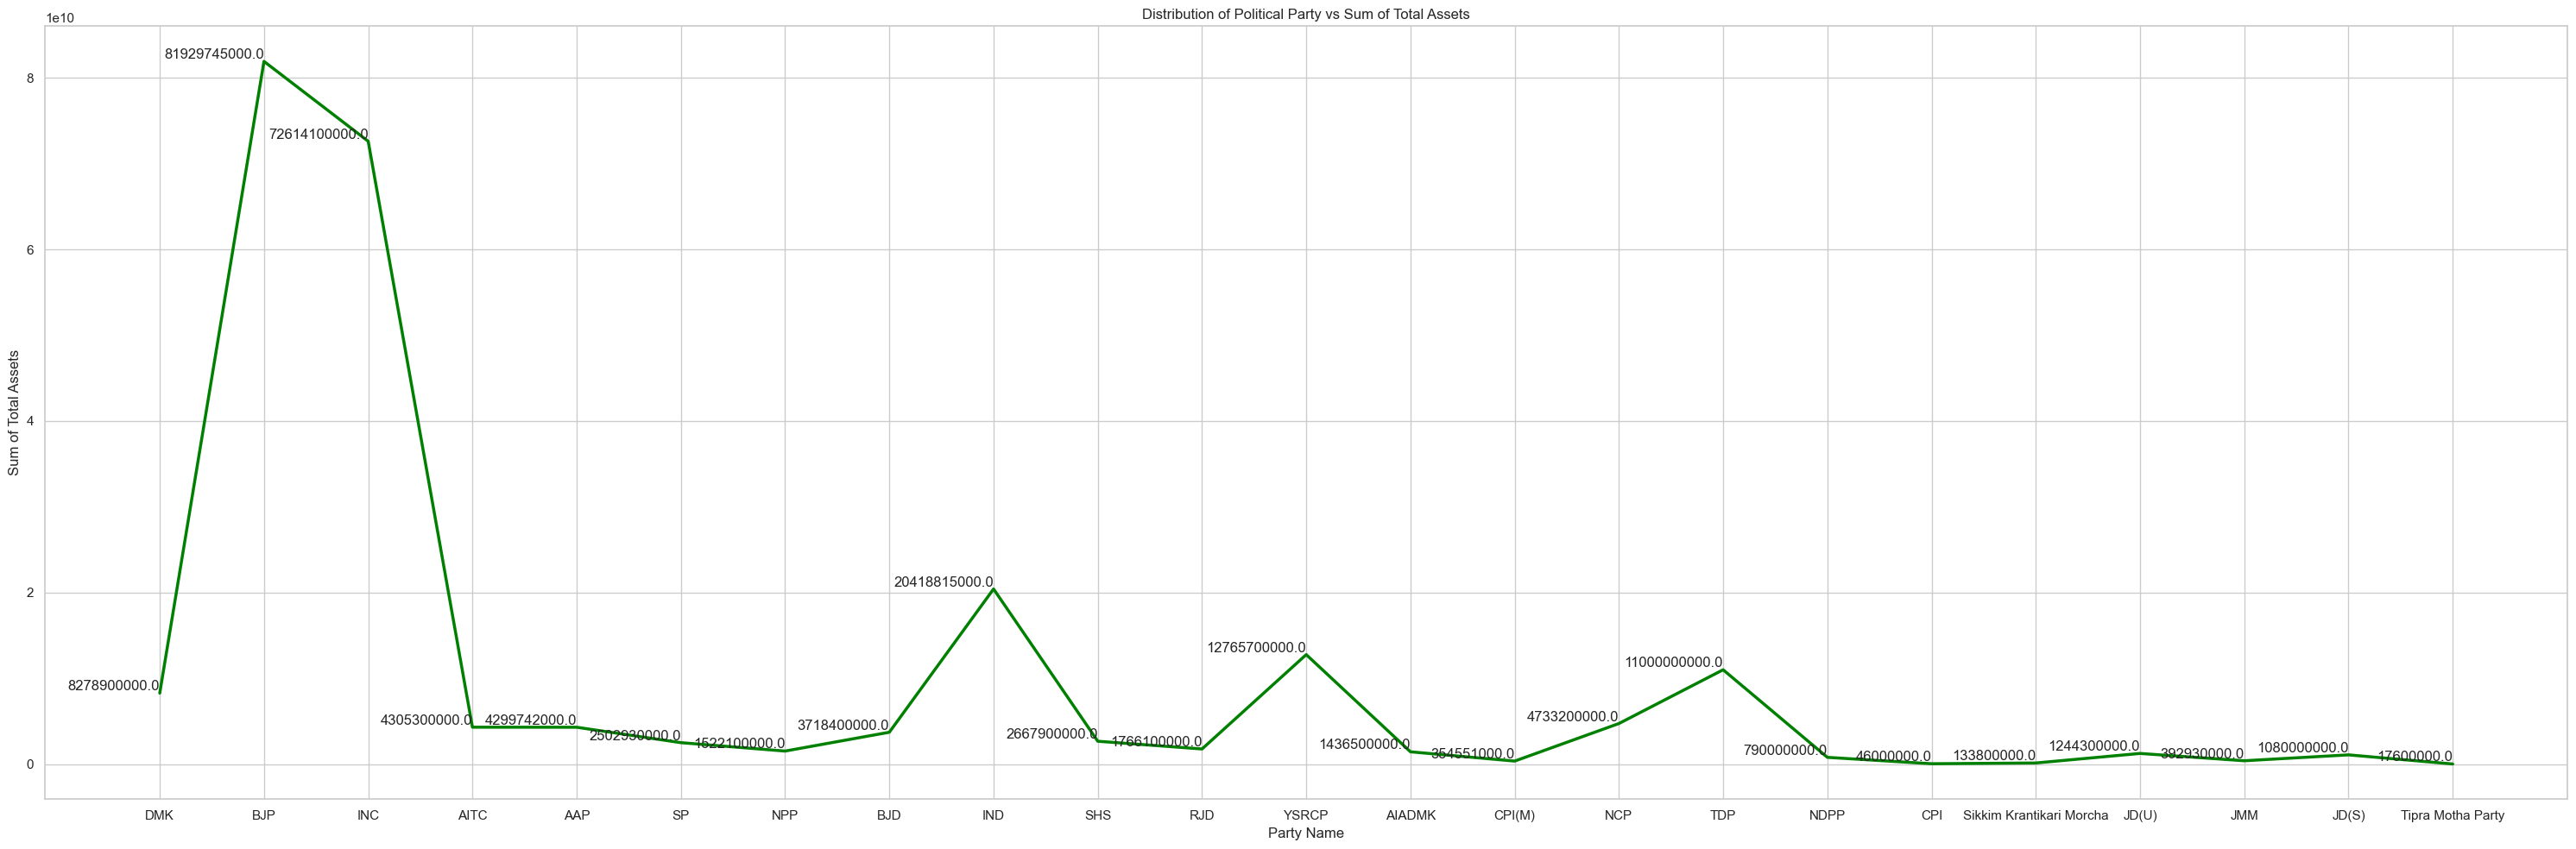

In [79]:
x=[]
y=[]
for party_name in df['Party'].unique():
    x.append(party_name)
    y.append(df[df['Party']==party_name]['Total Assets'].sum())
plt.figure(figsize=(30,10))
sns.lineplot(x=x,y=y,linewidth=2.5, sizes=30, color='green')
for i, txt in enumerate(y):
    plt.text(x[i], txt, str(txt), ha='right', va='bottom')
plt.xlabel('Party Name')
plt.ylabel('Sum of Total Assets')
plt.title('Distribution of Political Party vs Sum of Total Assets')
plt.tight_layout()
plt.savefig('./Distribution of Political Party vs Sum of Total Assets line plot.jpg',format='jpeg')
plt.show()

### LINE PLOT TO SHOWCASE THE MEAN TOTAL ASSETS FOR EACH POLITICAL PARTY, WITH MARGINS DENOTING THE MAX AND MIN NO OF TOPTAL ASSETS

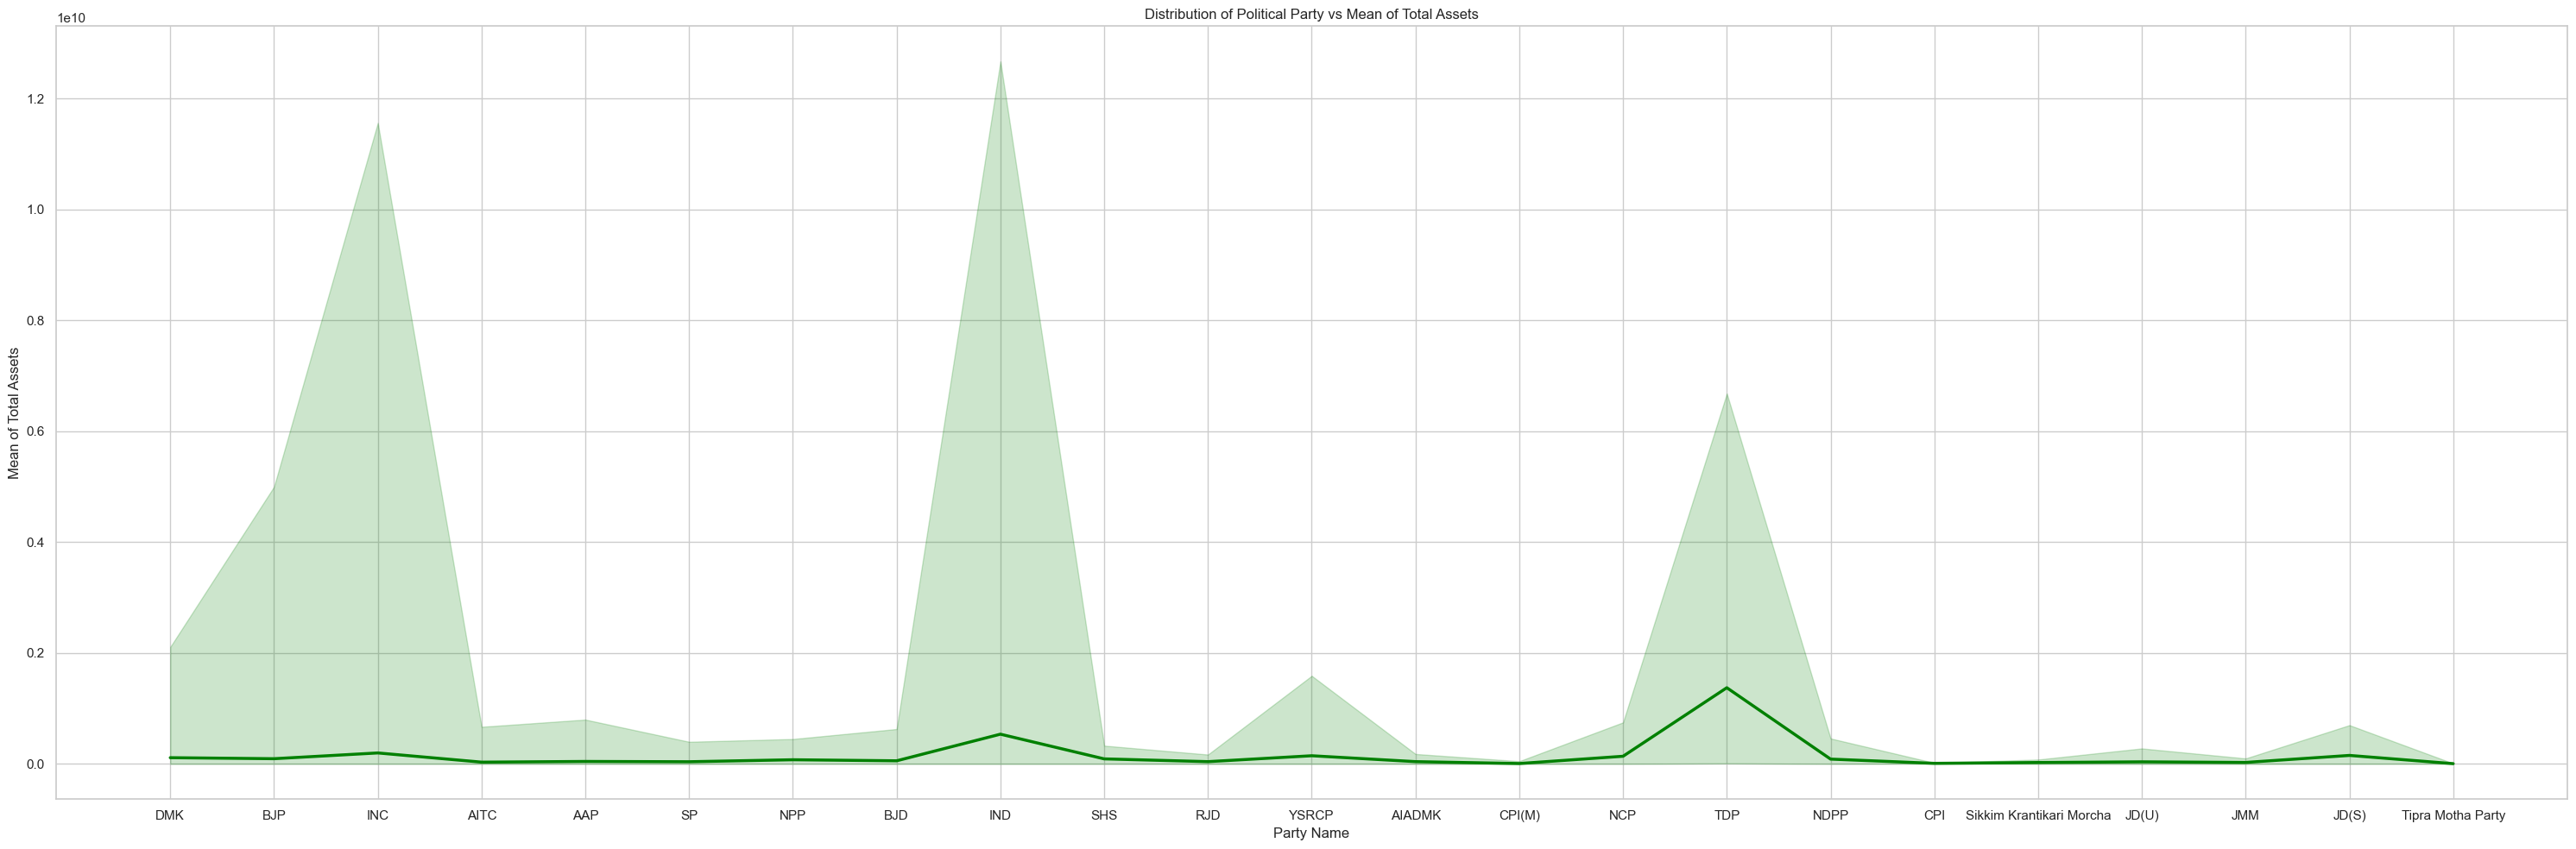

In [80]:
x=[]
y=[]
min_y=[]
max_y=[]
for party_name in df['Party'].unique():
    x.append(party_name)
    y.append(df[df['Party']==party_name]['Total Assets'].mean())
    min_y.append(df[df['Party']==party_name]['Total Assets'].min())
    max_y.append(df[df['Party']==party_name]['Total Assets'].max())
plt.figure(figsize=(30,10))
sns.lineplot(x=x,y=y,linewidth=2.5, sizes=30, color='green')
plt.fill_between(x, min_y, max_y, alpha=0.2, color='green')
plt.xlabel('Party Name')
plt.ylabel('Mean of Total Assets')
plt.title('Distribution of Political Party vs Mean of Total Assets')
plt.tight_layout()
plt.savefig('./Distribution of Political Party vs Mean of Total Assets lineplot.jpg',format='jpeg')
plt.show()

## ANALYSIS OF BEHAVIOUR OF LIABILITIES ACROSS DIFFERENT POLITICAL PARTIES

In [81]:
mean_liabilities = df['Liabilities'].mean()
print('Mean of liabilities is :',mean_liabilities)

Mean of liabilities is : 21590683.389995143


### PERCENTAGE OF MEMBERS OF A POLITICAL PARTY THAT HAVE LIABILITIES GREATER THAN THE MEAN LIABILITIES

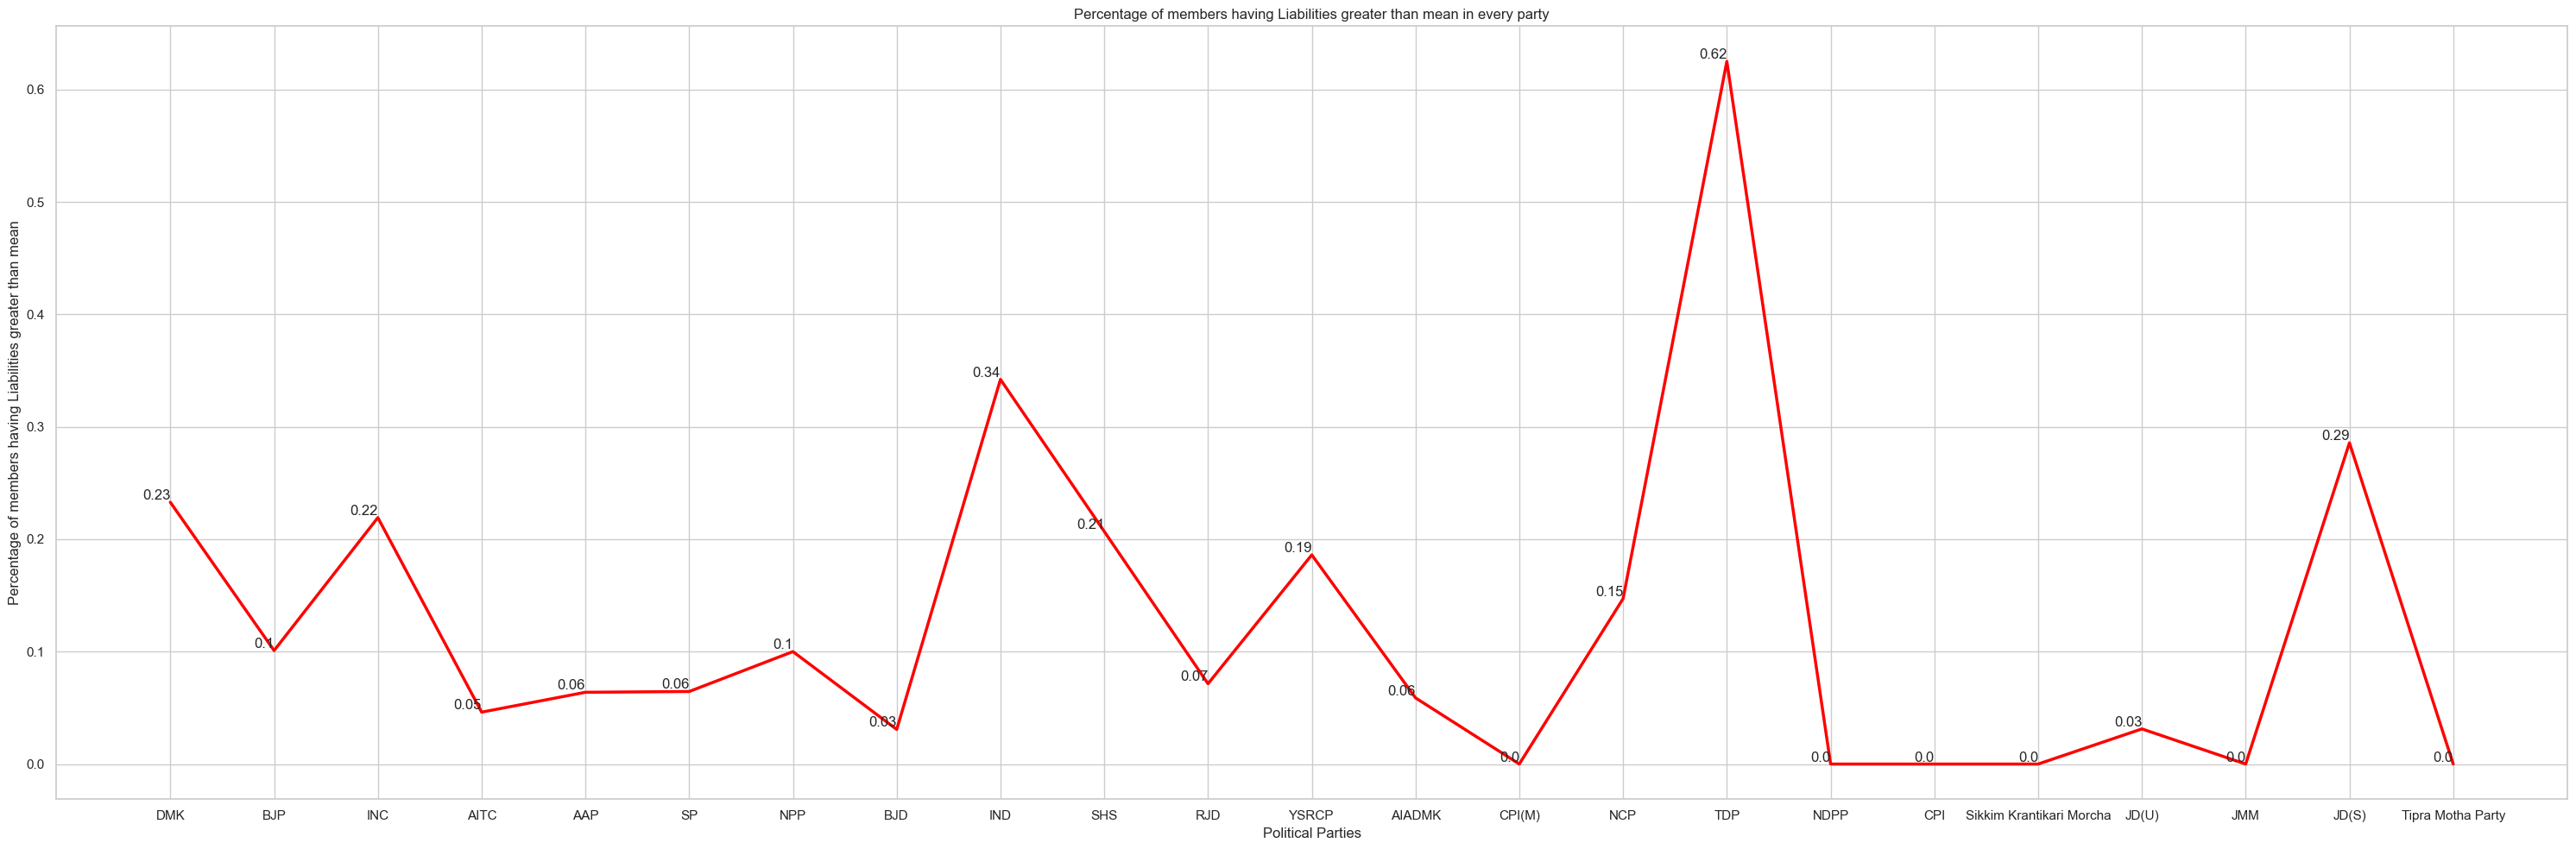

In [82]:
x=df['Party'].unique()
y=[]
for party in x:
    value=0
    for i in range(len(df)):
        if df['Party'][i]==party and df['Liabilities'][i]>mean_liabilities:
            value+=1
    value/=len(df[df['Party']==party])
    y.append(value)
plt.figure(figsize=(30,10))
sns.lineplot(x=x,y=y, linewidth=2.5, color='red')
for i, txt in enumerate(y):
    plt.text(x[i], txt, str(round(txt,2)), ha='right', va='bottom')
plt.xlabel('Political Parties')
plt.ylabel('Percentage of members having Liabilities greater than mean')
plt.title('Percentage of members having Liabilities greater than mean in every party')
plt.tight_layout()
plt.savefig('Percentage of members having Liabilities greater than mean in every party.png')
plt.show()

### PERCENTAGE OF MEMBERS OF A POLITICAL PARTY THAT HAVE LIABILITIES GREATER THAN THE MEAN W.R.T. ALL THE CANDIDATES ACROSS ALL POLITICAL PARTIES

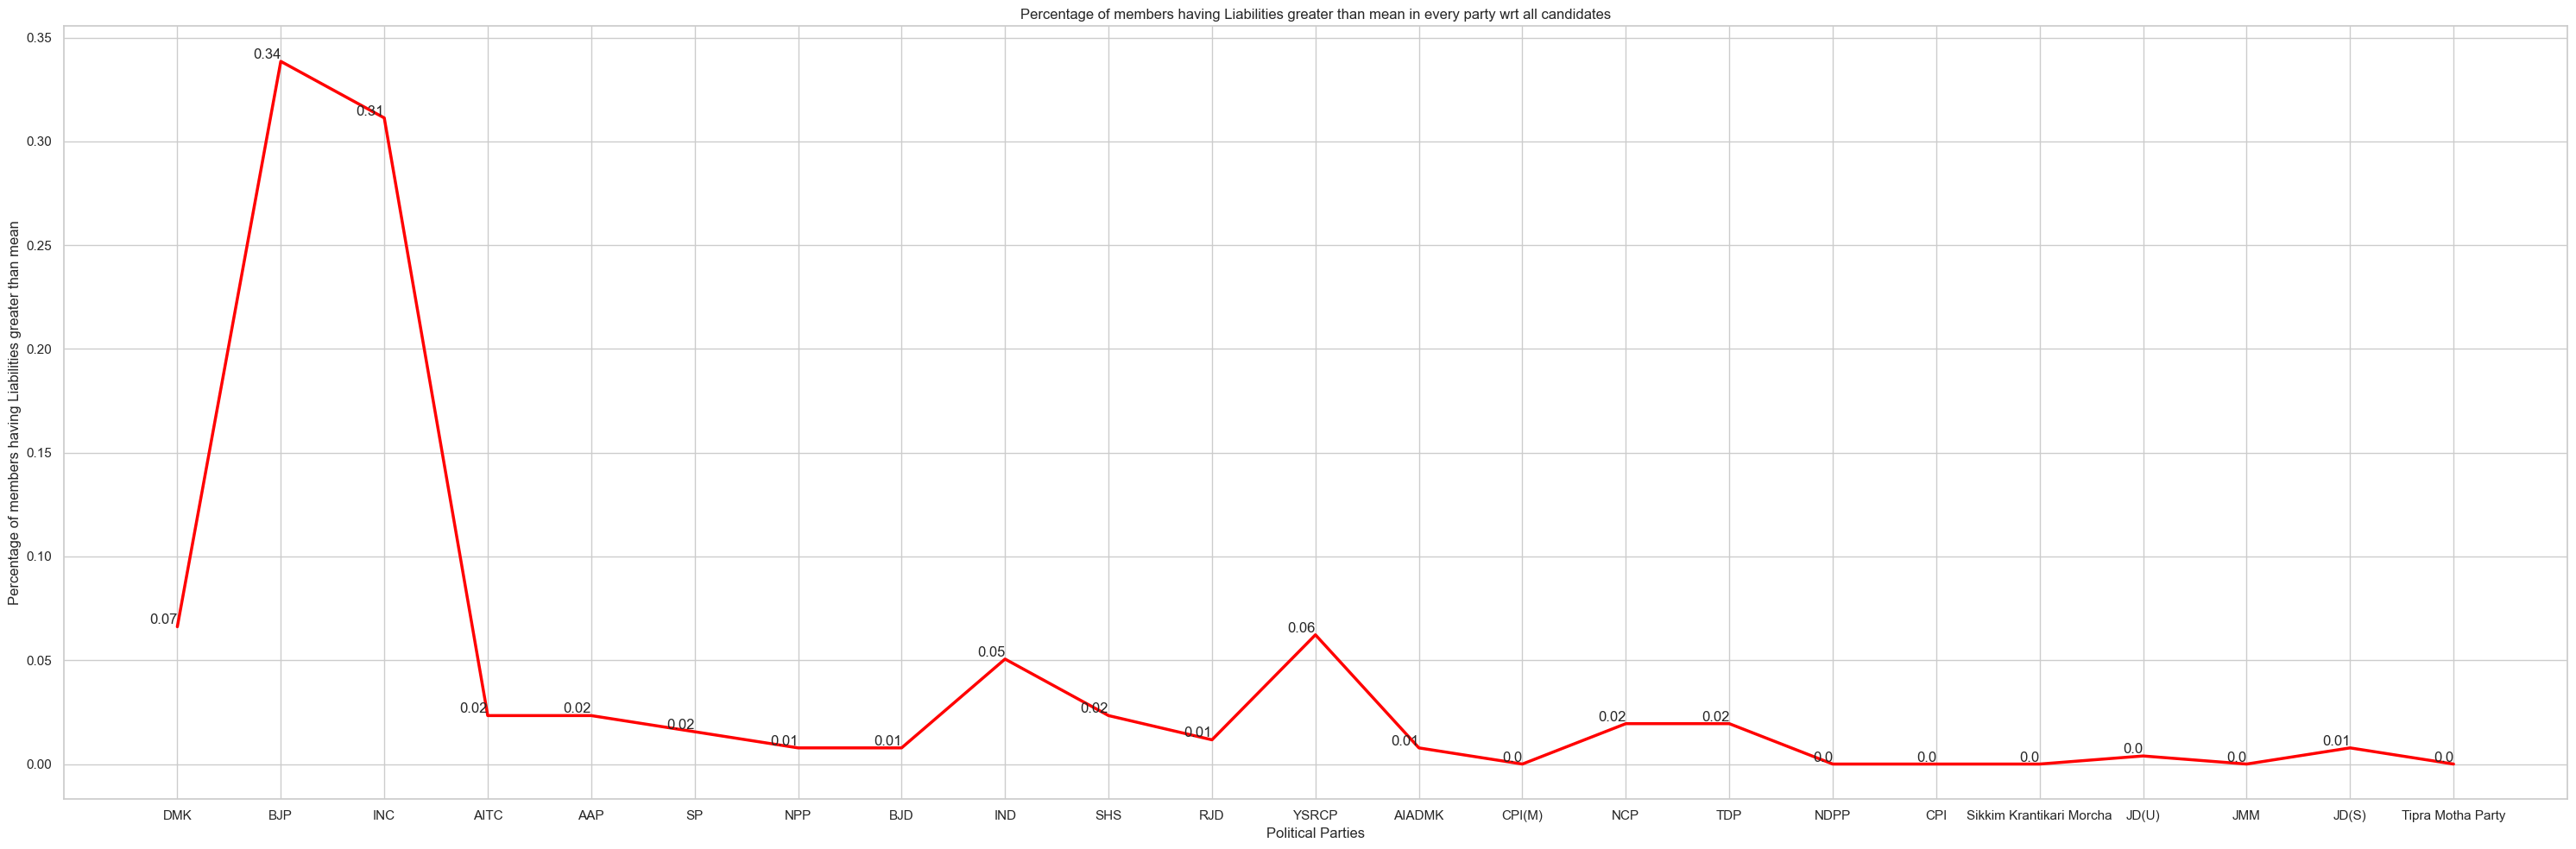

In [83]:
x=df['Party'].unique()
y=[]
for party in x:
    value=0
    for i in range(len(df)):
        if df['Party'][i]==party and df['Liabilities'][i]>mean_liabilities:
            value+=1
    value/=len(df[df['Liabilities']>mean_liabilities])
    y.append(value)
plt.figure(figsize=(30,10))
sns.lineplot(x=x,y=y, linewidth=2.5, color='red')
for i, txt in enumerate(y):
    plt.text(x[i], txt, str(round(txt,2)), ha='right', va='bottom')
plt.xlabel('Political Parties')
plt.ylabel('Percentage of members having Liabilities greater than mean')
plt.title('Percentage of members having Liabilities greater than mean in every party wrt all candidates')
plt.tight_layout()
plt.savefig('Percentage of members having Liabilities greater than mean in every party wrt all candidates.png')
plt.show()

### CATPLOT TO SHOWCASE THE LIABILITIES FOR ALL CANDIDADTES IN ALL POLITICAL PARTIES WITH STATE HUE

/Users/aditikhandelia/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 21.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/aditikhandelia/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 87.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/aditikhandelia/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 71.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/aditikhandelia/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 64.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/aditikhandelia/anaconda3/

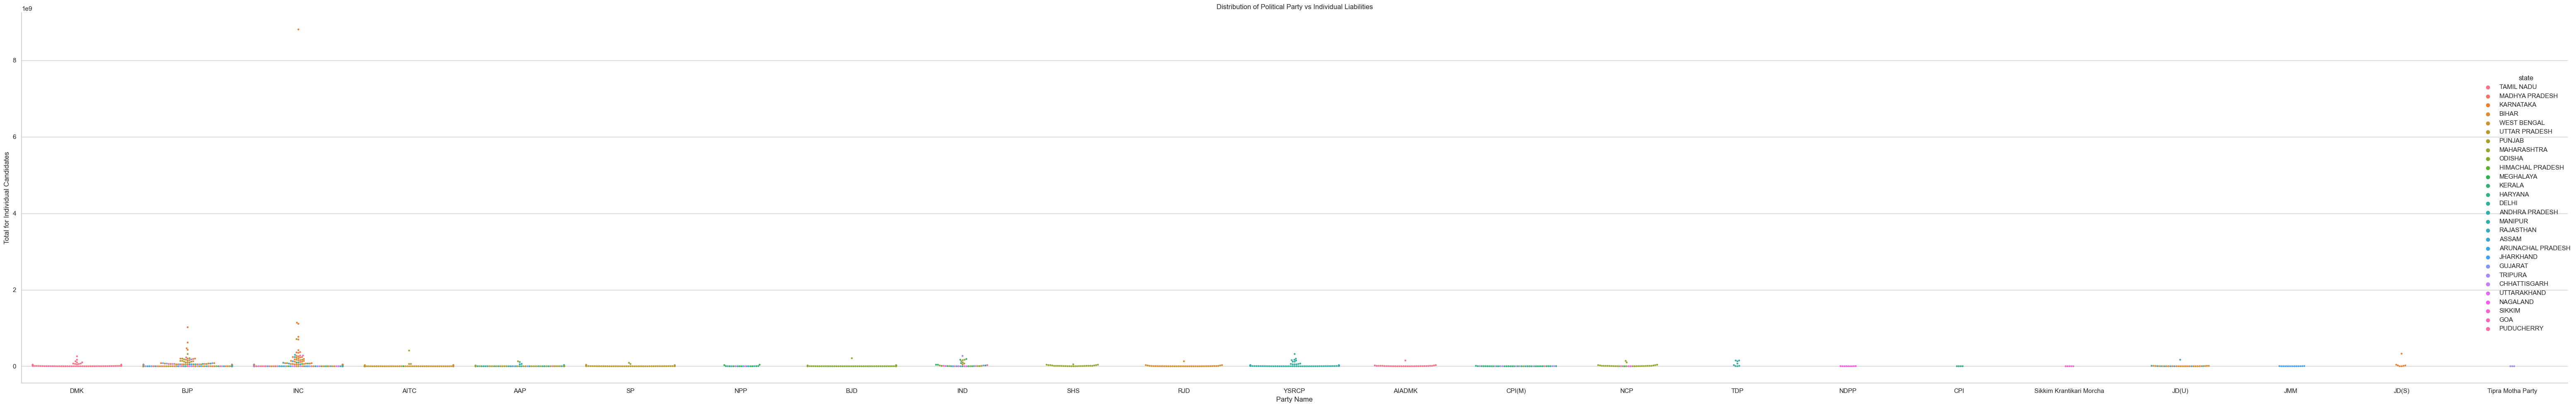

In [84]:
plot=sns.catplot(data=df, x='Party', y='Liabilities', height=10, aspect=6, s=10,hue='state', kind="swarm")
plot.set_axis_labels('Party Name','Total for Individual Candidates')
plt.subplots_adjust(top=0.9) 
plt.title('Distribution of Political Party vs Individual Liabilities')
plt.tight_layout()
plt.savefig('./Distribution of Political Party vs Individual Liabilities catplot state hue.jpg',format='jpeg')
plt.show()

### LINE PLOT TO SHOWCASE THE SUM OF LIABILITIES FOR ALL CANDIDATES OF ALL POLITICAL PARTIES

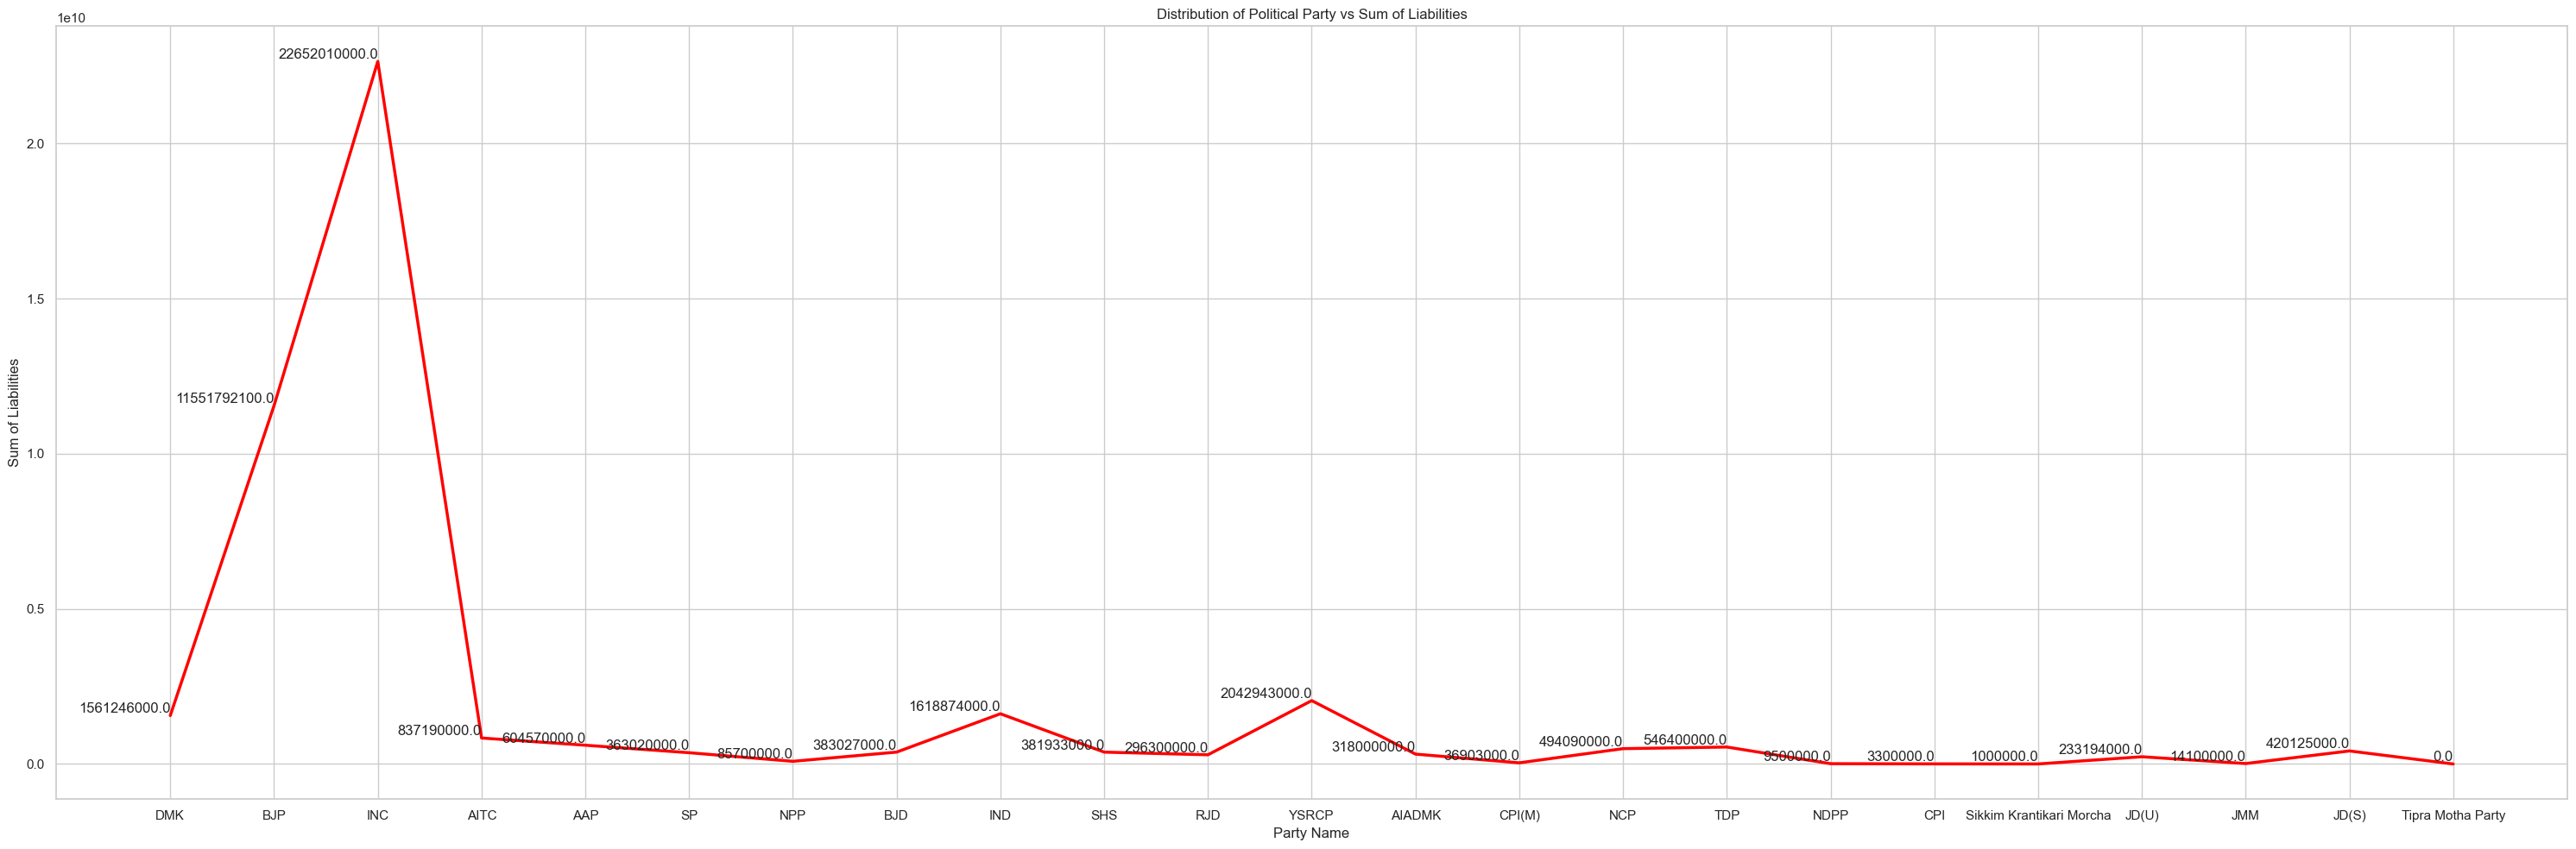

In [85]:
x=[]
y=[]
for party_name in df['Party'].unique():
    x.append(party_name)
    y.append(df[df['Party']==party_name]['Liabilities'].sum())
plt.figure(figsize=(30,10))
sns.lineplot(x=x,y=y,linewidth=2.5, sizes=30, color='red')
for i, txt in enumerate(y):
    plt.text(x[i], txt, str(txt), ha='right', va='bottom')
plt.xlabel('Party Name')
plt.ylabel('Sum of Liabilities')
plt.title('Distribution of Political Party vs Sum of Liabilities')
plt.tight_layout()
plt.savefig('./Distribution of Political Party vs Sum of Liabilities line plot.jpg',format='jpeg')
plt.show()

### LINE PLOT TO SHOWCASE THE MEAN LIABILITIES FOR EACH POLITICAL PARTY, WITH MARGINS DENOTING THE MAX AND MIN NO OF LIABILITIES

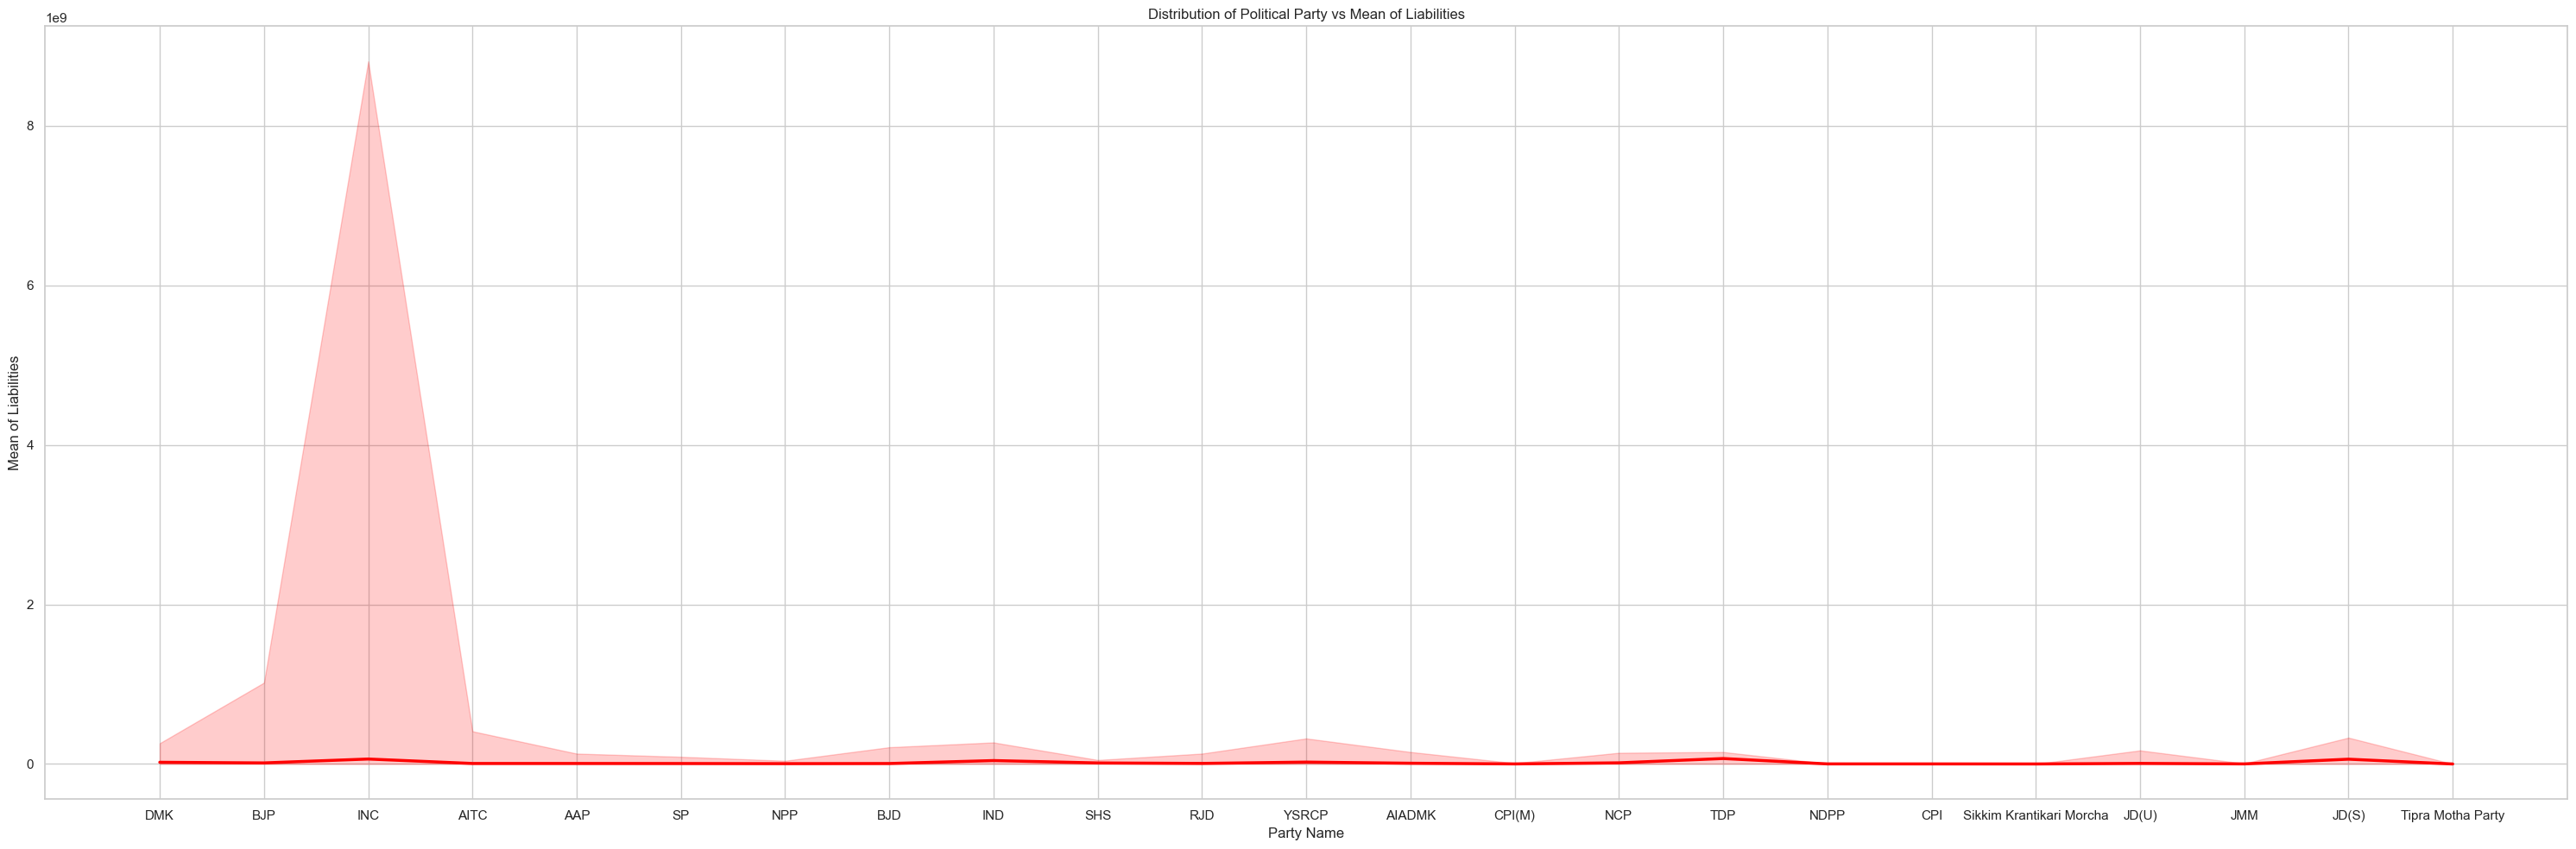

In [86]:
x=[]
y=[]
min_y=[]
max_y=[]
for party_name in df['Party'].unique():
    x.append(party_name)
    y.append(df[df['Party']==party_name]['Liabilities'].mean())
    min_y.append(df[df['Party']==party_name]['Liabilities'].min())
    max_y.append(df[df['Party']==party_name]['Liabilities'].max())
plt.figure(figsize=(30,10))
sns.lineplot(x=x,y=y,linewidth=2.5, sizes=30, color='red')
plt.fill_between(x, min_y, max_y, alpha=0.2, color='red')
plt.xlabel('Party Name')
plt.ylabel('Mean of Liabilities')
plt.title('Distribution of Political Party vs Mean of Liabilities')
plt.tight_layout()
plt.savefig('./Distribution of Political Party vs Mean of Liabilities lineplot.jpg',format='jpeg')
plt.show()

## ANALYSIS OF BEHAVIOUR OF NET INCOME ACROSS DIFFERENT POLITICAL PARTIES

In [87]:
mean_net_income = df['Net Income'].mean()
print('The mean of net income is : ',mean_net_income)

The mean of net income is :  94008448.71296746


### PERCENTAGE OF MEMBERS OF A POLITICAL PARTY THAT HAVE NET INCOME GREATER THAN THE MEAN NO. OF NET INCOME

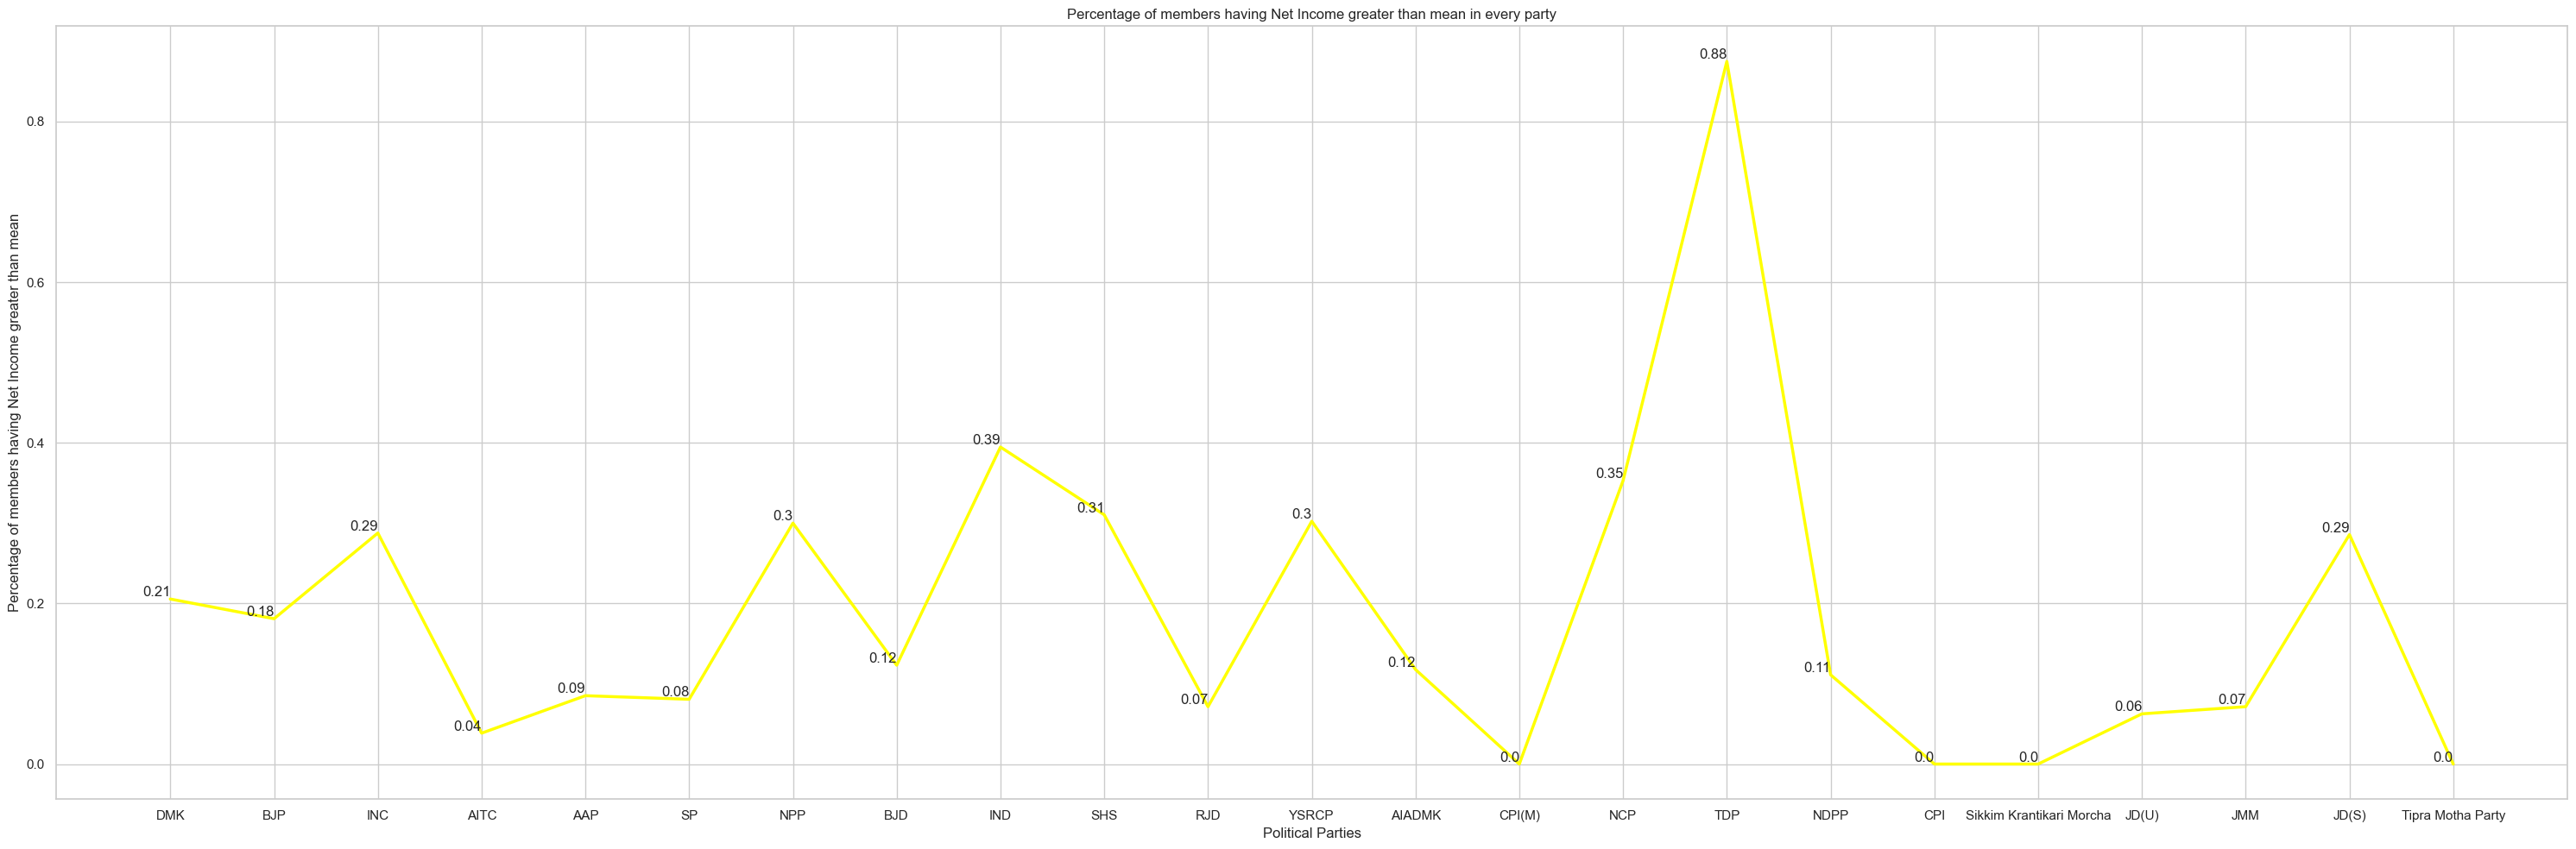

In [88]:
x=df['Party'].unique()
y=[]
for party in x:
    value=0
    for i in range(len(df)):
        if df['Party'][i]==party and df['Net Income'][i]>mean_net_income:
            value+=1
    value/=len(df[df['Party']==party])
    y.append(value)
plt.figure(figsize=(30,10))
sns.lineplot(x=x,y=y, linewidth=2.5, color='yellow')
for i, txt in enumerate(y):
    plt.text(x[i], txt, str(round(txt,2)), ha='right', va='bottom')
plt.xlabel('Political Parties')
plt.ylabel('Percentage of members having Net Income greater than mean')
plt.title('Percentage of members having Net Income greater than mean in every party')
plt.tight_layout()
plt.savefig('Percentage of members having Net Income greater than mean in every party.png')
plt.show()

### PERCENTAGE OF MEMBERS OF A POLITICAL PARTY THAT HAVE NET INCOME GREATER THAN THE MEAN W.R.T. ALL THE CANDIDATES ACROSS ALL POLITICAL PARTIES

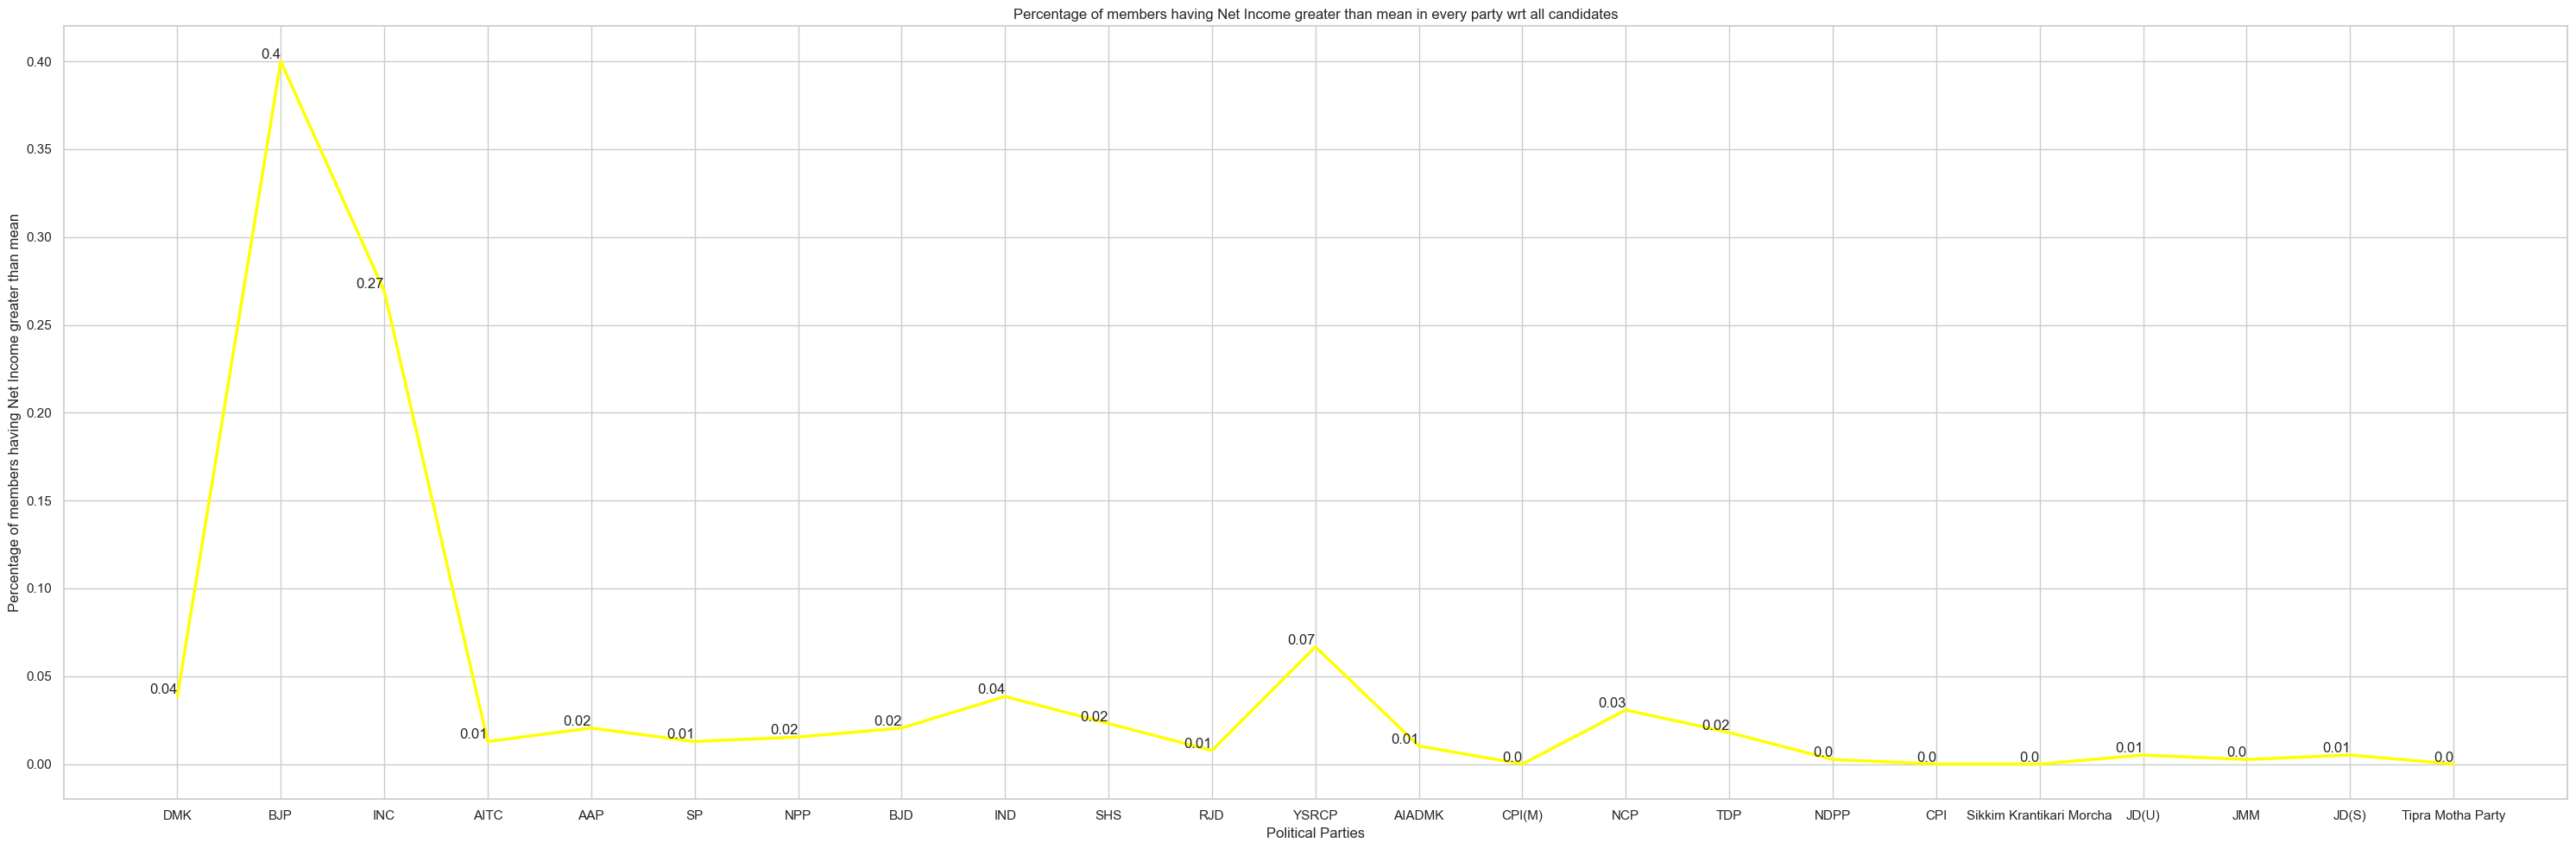

In [89]:
x=df['Party'].unique()
y=[]
for party in x:
    value=0
    for i in range(len(df)):
        if df['Party'][i]==party and df['Net Income'][i]>mean_net_income:
            value+=1
    value/=len(df[df['Net Income']>mean_net_income])
    y.append(value)
plt.figure(figsize=(30,10))
sns.lineplot(x=x,y=y, linewidth=2.5, color='yellow')
for i, txt in enumerate(y):
    plt.text(x[i], txt, str(round(txt,2)), ha='right', va='bottom')
plt.xlabel('Political Parties')
plt.ylabel('Percentage of members having Net Income greater than mean')
plt.title('Percentage of members having Net Income greater than mean in every party wrt all candidates')
plt.tight_layout()
plt.savefig('Percentage of members having Net Income greater than mean in every party wrt all candidates.png')
plt.show()

### CATPLOT TO SHOWCASE THE NET INCOME FOR ALL CANDIDADTES IN ALL POLITICAL PARTIES WITH STATE HUE

/Users/aditikhandelia/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 21.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/aditikhandelia/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 87.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/aditikhandelia/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 71.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/aditikhandelia/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 64.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/aditikhandelia/anaconda3/

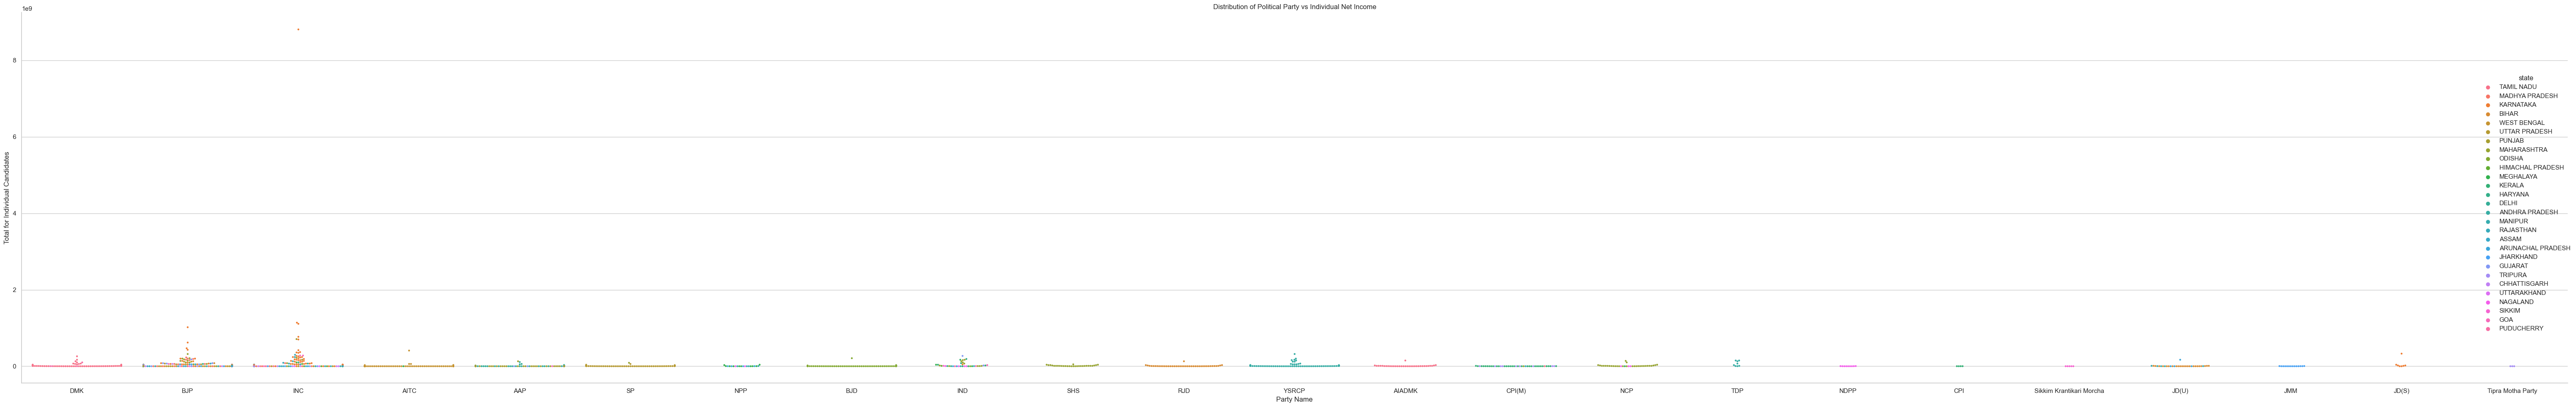

In [90]:
plot=sns.catplot(data=df, x='Party', y='Liabilities', height=10, aspect=6, s=10,hue='state', kind="swarm")
plot.set_axis_labels('Party Name','Total for Individual Candidates')
plt.subplots_adjust(top=0.9) 
plt.title('Distribution of Political Party vs Individual Net Income')
plt.tight_layout()
plt.savefig('./Distribution of Political Party vs Individual Net Income catplot state hue.jpg',format='jpeg')
plt.show()

### LINE PLOT TO SHOWCASE THE SUM OF NET INCOME FOR ALL CANDIDATES OF ALL POLITICAL PARTIES

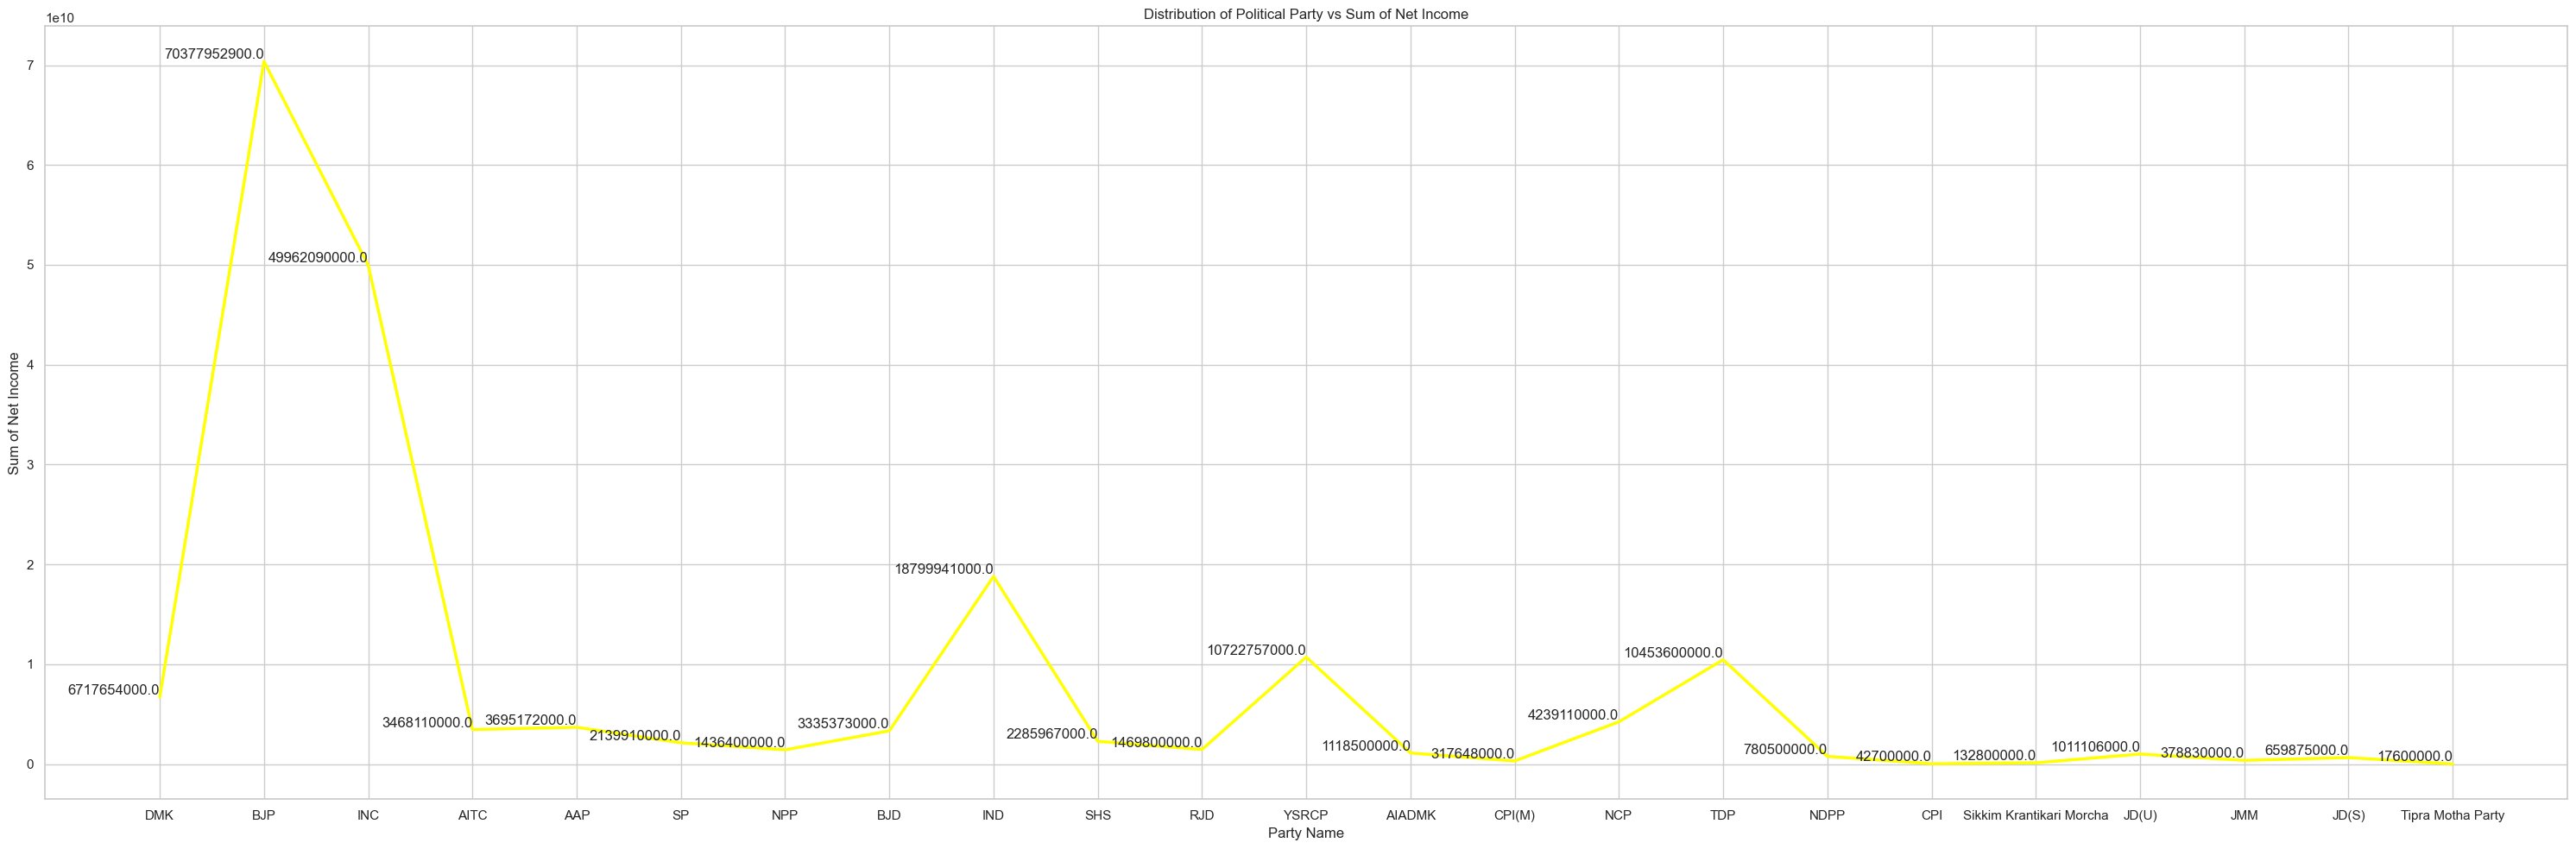

In [91]:
x=[]
y=[]
for party_name in df['Party'].unique():
    x.append(party_name)
    y.append(df[df['Party']==party_name]['Net Income'].sum())
plt.figure(figsize=(30,10))
sns.lineplot(x=x,y=y,linewidth=2.5, sizes=30, color='yellow')
for i, txt in enumerate(y):
    plt.text(x[i], txt, str(txt), ha='right', va='bottom')
plt.xlabel('Party Name')
plt.ylabel('Sum of Net Income')
plt.title('Distribution of Political Party vs Sum of Net Income')
plt.tight_layout()
plt.savefig('./Distribution of Political Party vs Sum of Net Income line plot.jpg',format='jpeg')
plt.show()

### LINE PLOT TO SHOWCASE THE MEAN NET INCOME FOR EACH POLITICAL PARTY, WITH MARGINS DENOTING THE MAX AND MIN NO OF NET INCOME

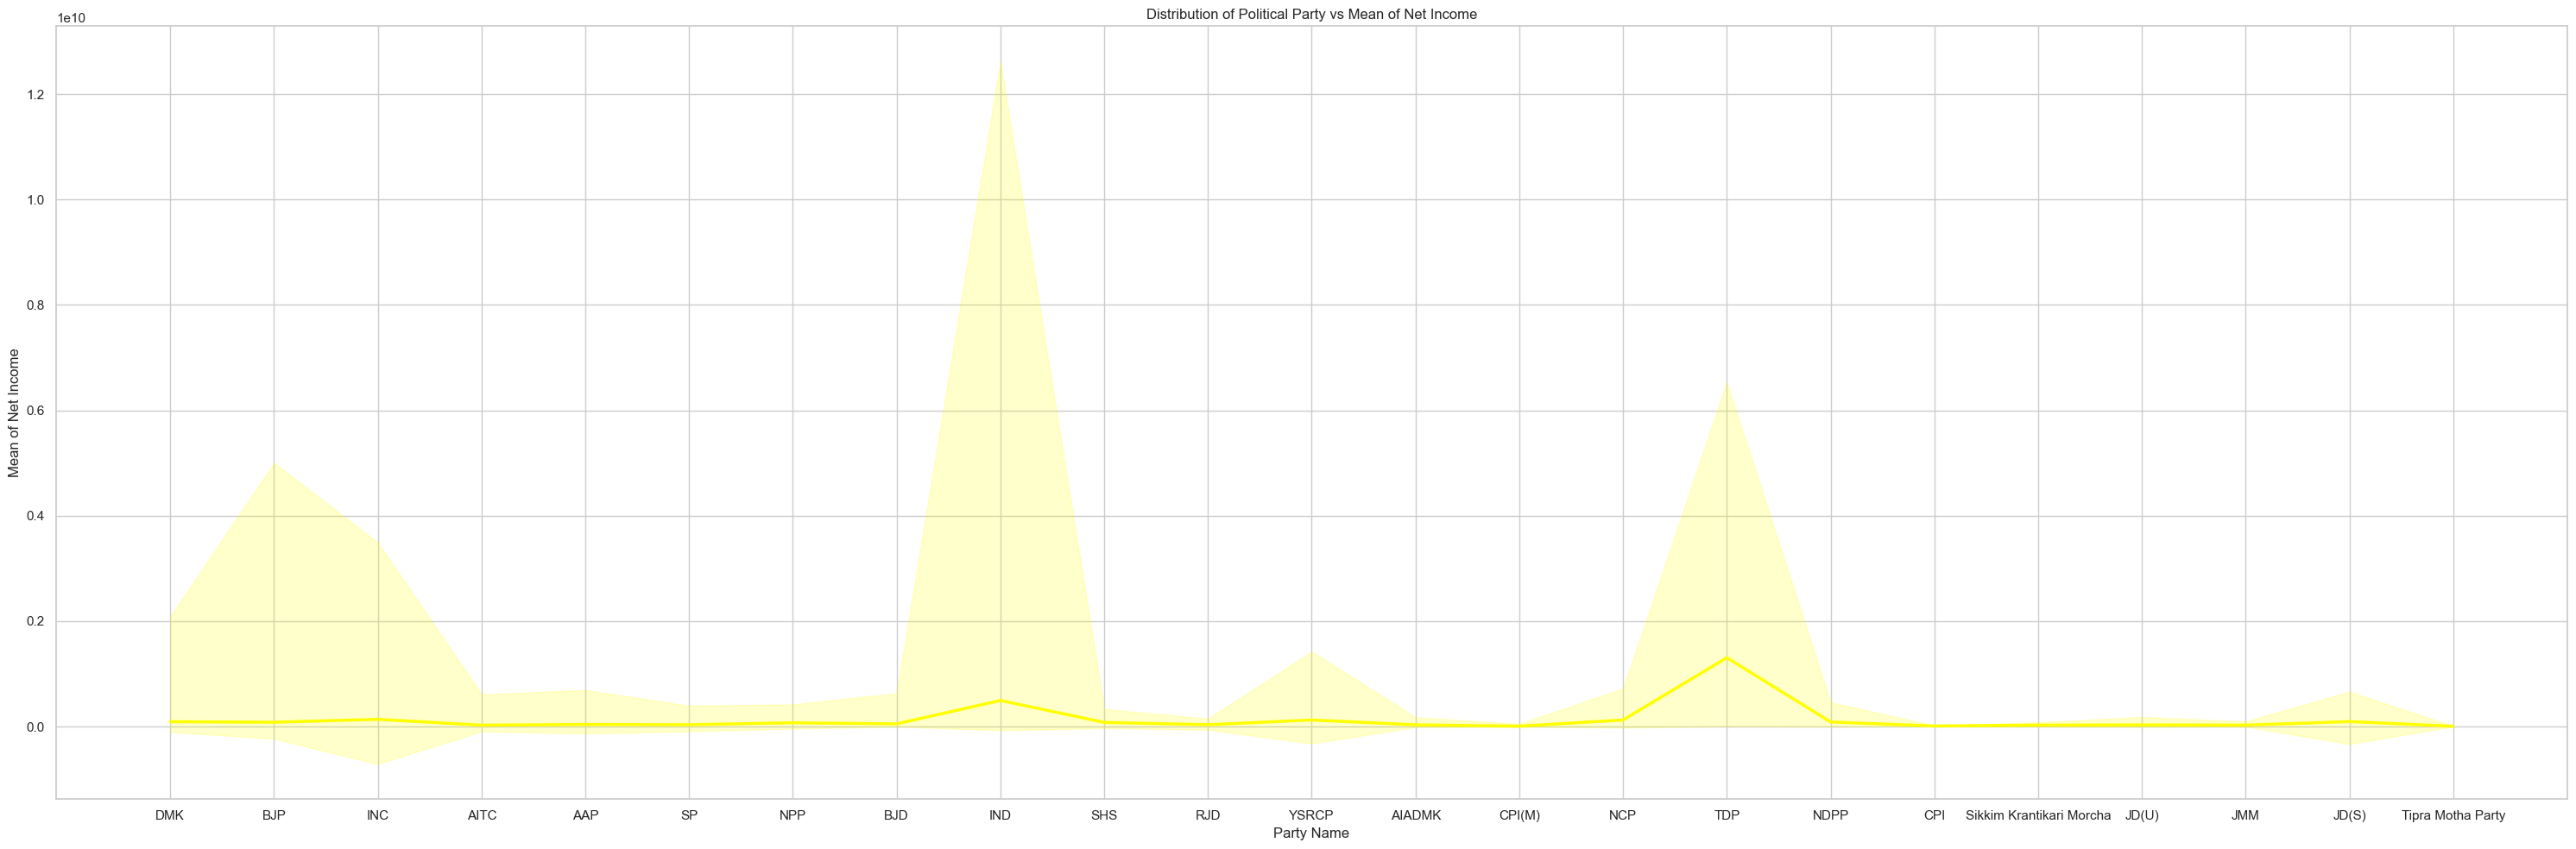

In [92]:
x=[]
y=[]
min_y=[]
max_y=[]
for party_name in df['Party'].unique():
    x.append(party_name)
    y.append(df[df['Party']==party_name]['Net Income'].mean())
    min_y.append(df[df['Party']==party_name]['Net Income'].min())
    max_y.append(df[df['Party']==party_name]['Net Income'].max())
plt.figure(figsize=(30,10))
sns.lineplot(x=x,y=y,linewidth=2.5, sizes=30, color='yellow')
plt.fill_between(x, min_y, max_y, alpha=0.2, color='yellow')
plt.xlabel('Party Name')
plt.ylabel('Mean of Net Income')
plt.title('Distribution of Political Party vs Mean of Net Income')
plt.tight_layout()
plt.savefig('./Distribution of Political Party vs Mean of Net Income lineplot.jpg',format='jpeg')
plt.show()

## ANALYSIS OF DISTRIBUTION OF LABELS BASED ON DIFFERENT FEATURES

In [93]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le_1=LabelEncoder()
le_2=LabelEncoder()
df['Party']=le.fit_transform(df['Party'])
df['state']=le_1.fit_transform(df['state'])
df['Education']=le_2.fit_transform(df['Education'])
df=df.drop(['Candidate','Constituency ∇','ID'],axis=1)

In [94]:
df.head()

Party  Criminal Case  Total Assets  Liabilities  state  Education  \
0      7              4  2.110000e+09   20000000.0     23          3   
1      4              0  1.000000e+07          0.0     13          1   
2      8              0  7.000000e+07    2200000.0     11          9   
3      4              0  9.000000e+07    2400000.0      3          9   
4      4              2  2.000000e+07    6100000.0     27          3   

     Net Income  
0  2.090000e+09  
1  1.000000e+07  
2  6.780000e+07  
3  8.760000e+07  
4  1.390000e+07

### DISTRIBUTION OF LABELS ACROSS THE DATASET

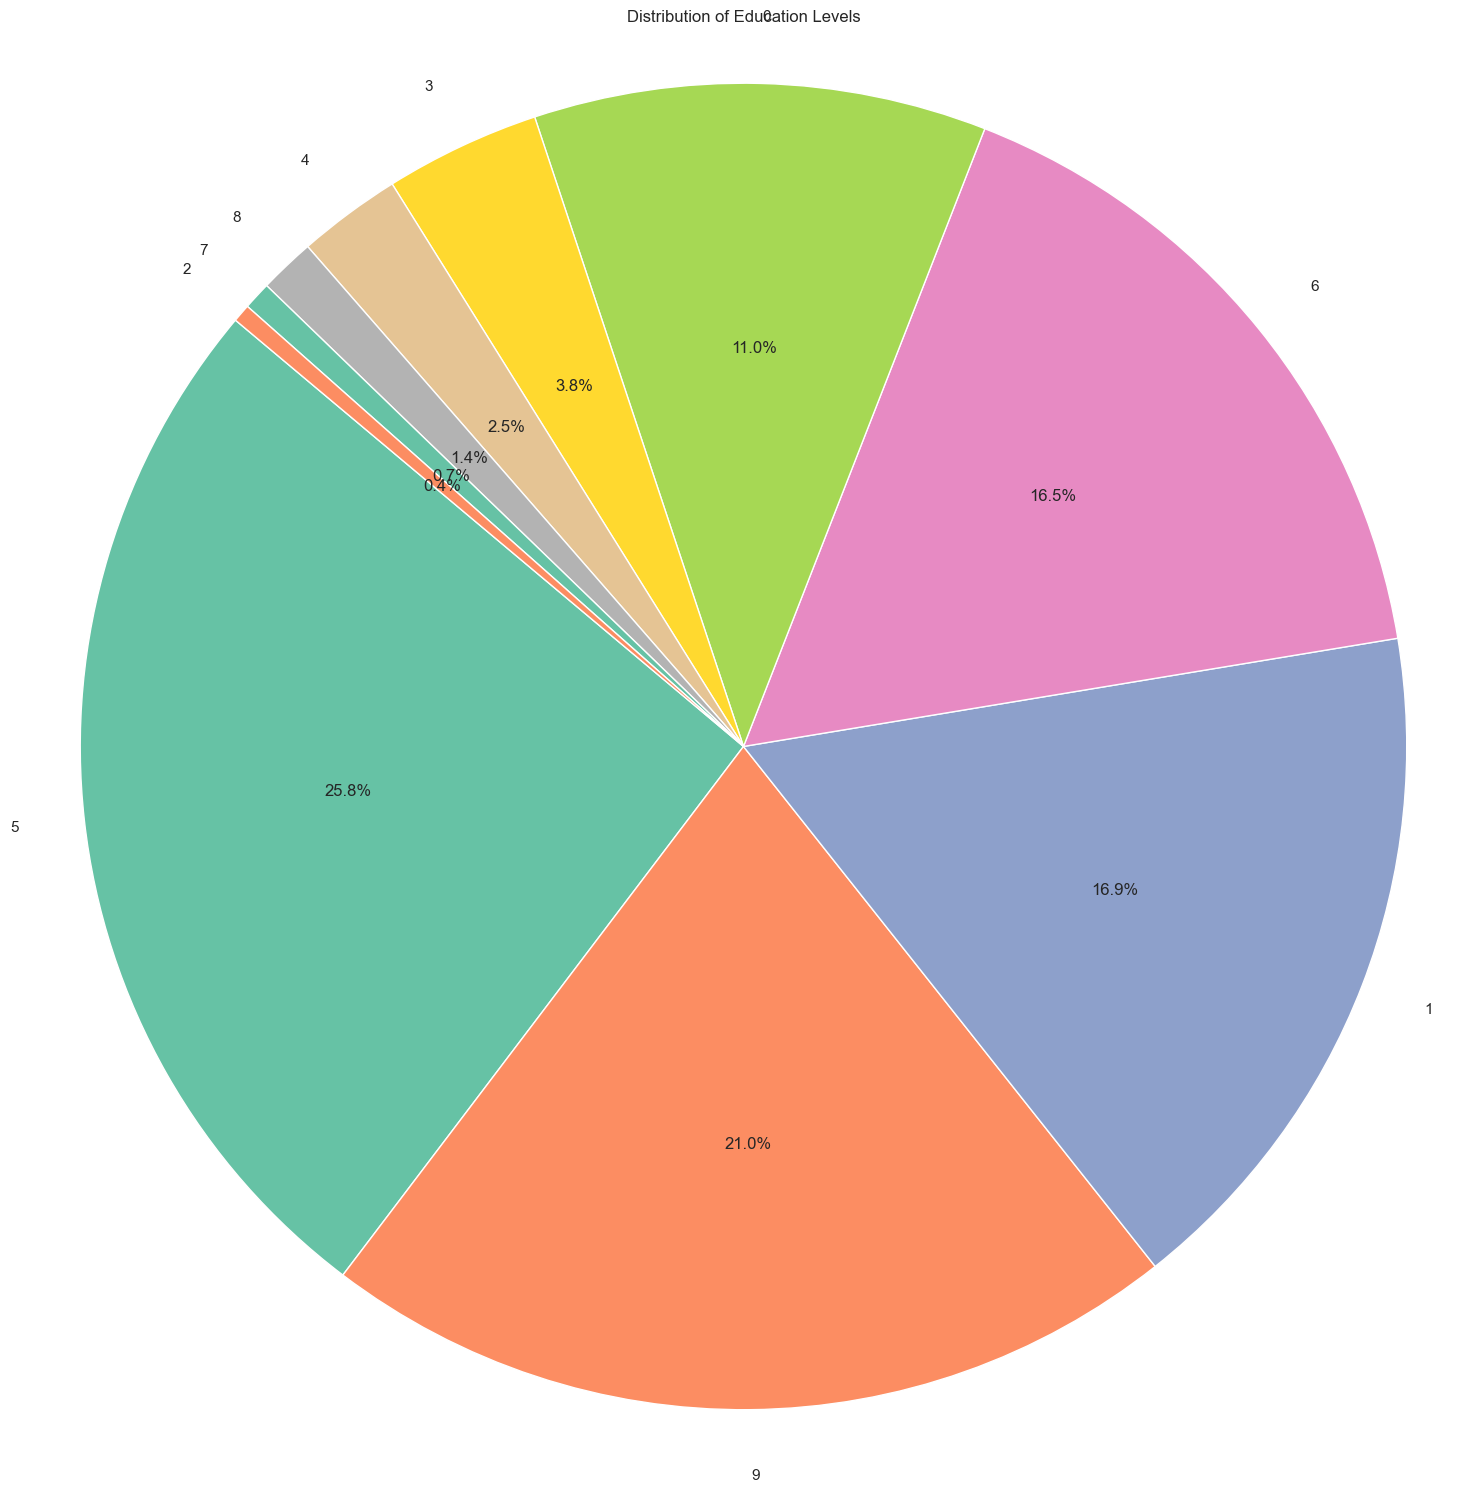

In [95]:
education_counts = df['Education'].value_counts()
plt.figure(figsize=(15, 15))
sns.set(style="whitegrid")
sns.set_palette("Set2")
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Distribution of Education Levels')
plt.tight_layout()
plt.savefig('Distribution_of_Education_Levels_piechart_seaborn.jpg', format='jpeg')
plt.show()

### MAKING A HEATMAP

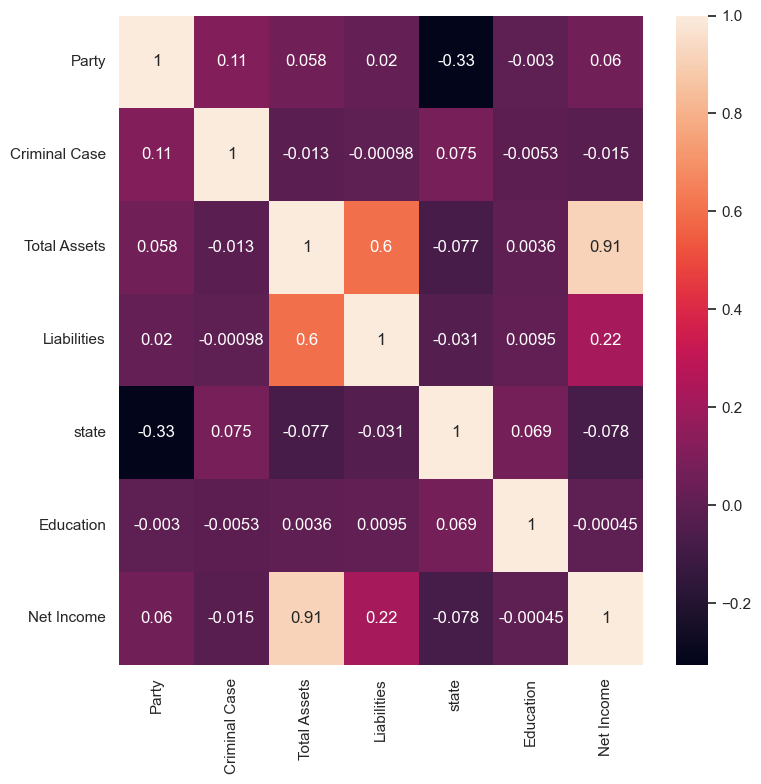

In [96]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.tight_layout()
plt.savefig('./Correlation Heatmap.jpg',format='jpeg')
plt.show()

### PLOTS OF CLASSES AND DIFFEENT FEATURES

In [97]:
df['Education']=le_2.inverse_transform(df['Education'])
df['state']=le_1.inverse_transform(df['state'])
df['Party']=le.inverse_transform(df['Party'])

In [98]:
df.head()

Party  Criminal Case  Total Assets  Liabilities           state  \
0   DMK              4  2.110000e+09   20000000.0      TAMIL NADU   
1   BJP              0  1.000000e+07          0.0  MADHYA PRADESH   
2   INC              0  7.000000e+07    2200000.0       KARNATAKA   
3   BJP              0  9.000000e+07    2400000.0           BIHAR   
4   BJP              2  2.000000e+07    6100000.0     WEST BENGAL   

       Education    Net Income  
0       8th Pass  2.090000e+09  
1      12th Pass  1.000000e+07  
2  Post Graduate  6.780000e+07  
3  Post Graduate  8.760000e+07  
4       8th Pass  1.390000e+07

### W.R.T. CRIMINAL CASE RECORD

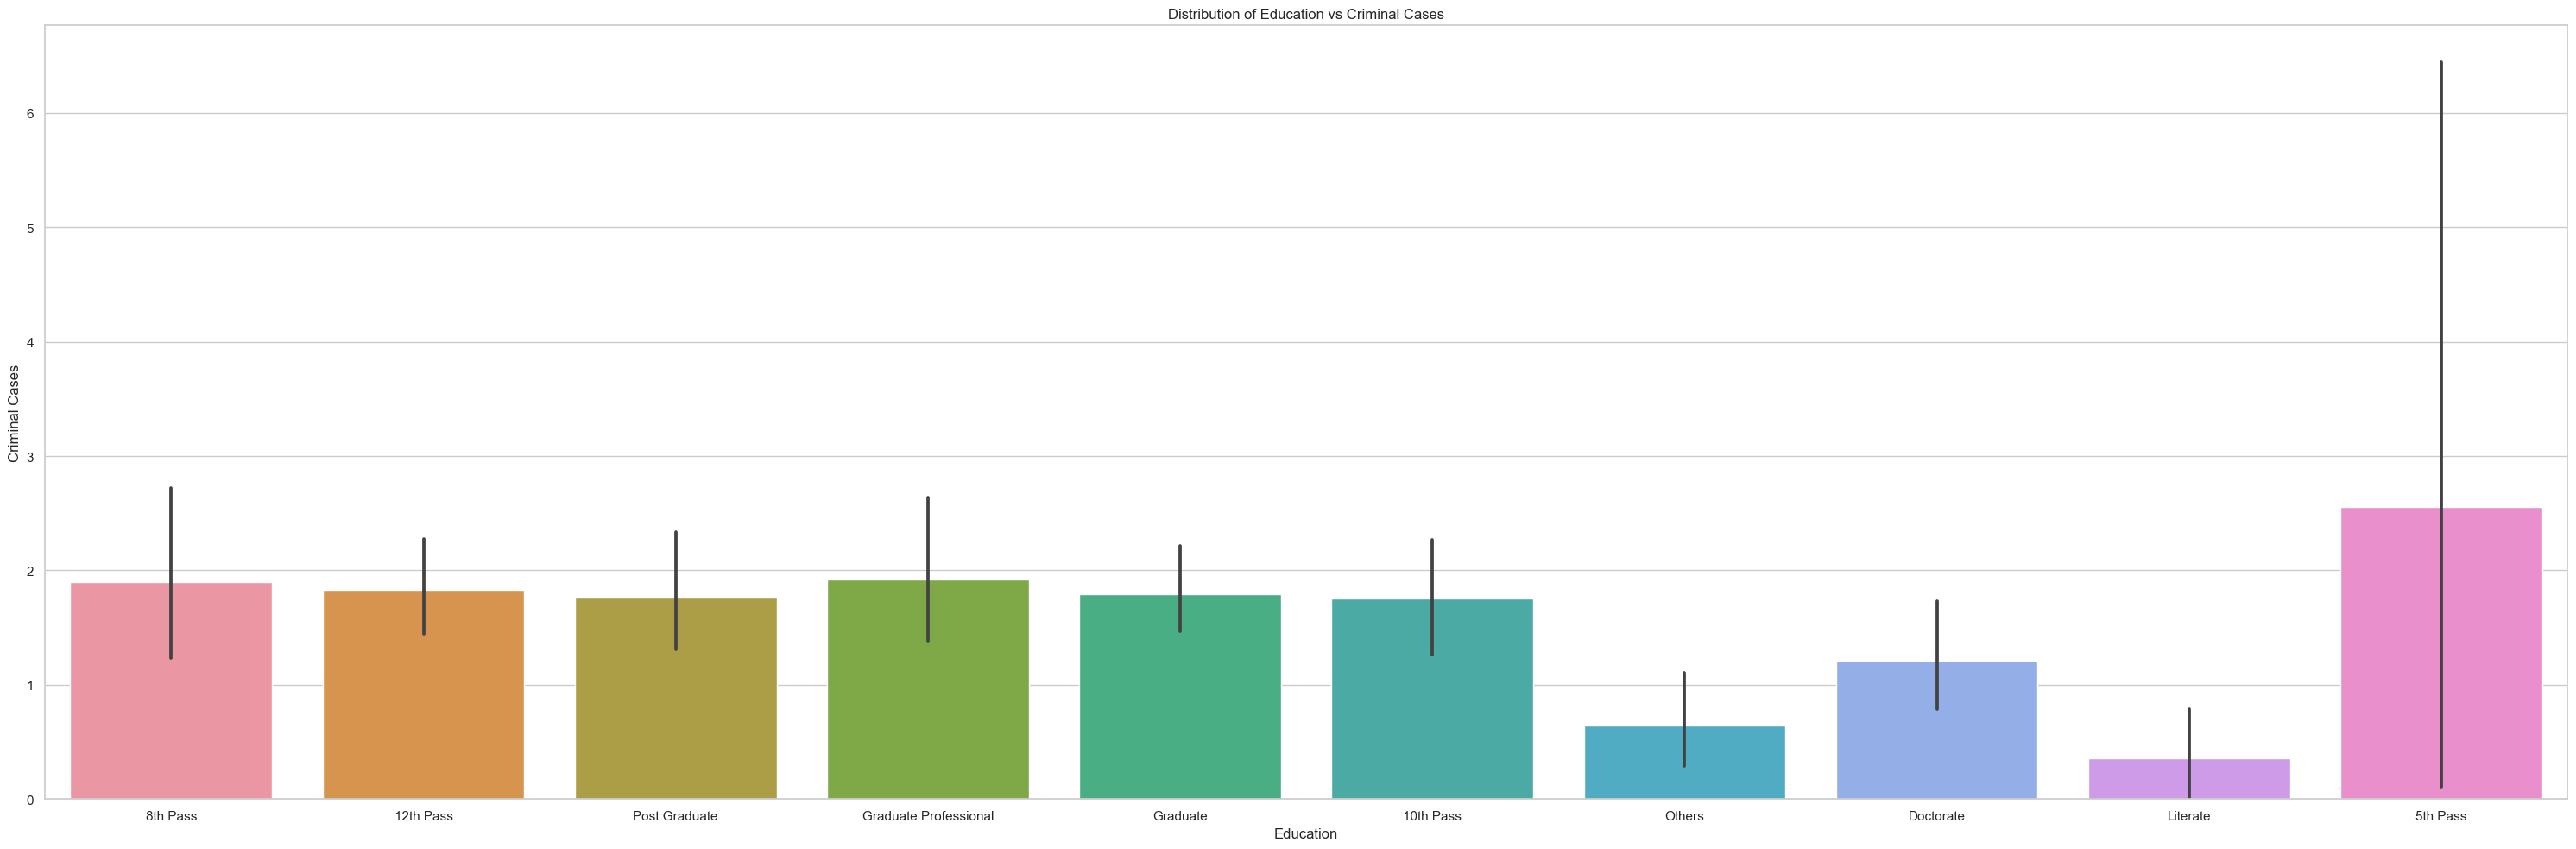

In [99]:
x=df['Education']
y=df['Criminal Case']
plt.figure(figsize=(30,10))
sns.barplot(x=x,y=y)
plt.xlabel('Education')
plt.ylabel('Criminal Cases')
plt.title('Distribution of Education vs Criminal Cases')
plt.tight_layout()
plt.savefig('./Distribution of Education vs Criminal Cases barplot.jpg',format='jpeg')
plt.show()

### W.R.T. TOTAL ASSETS

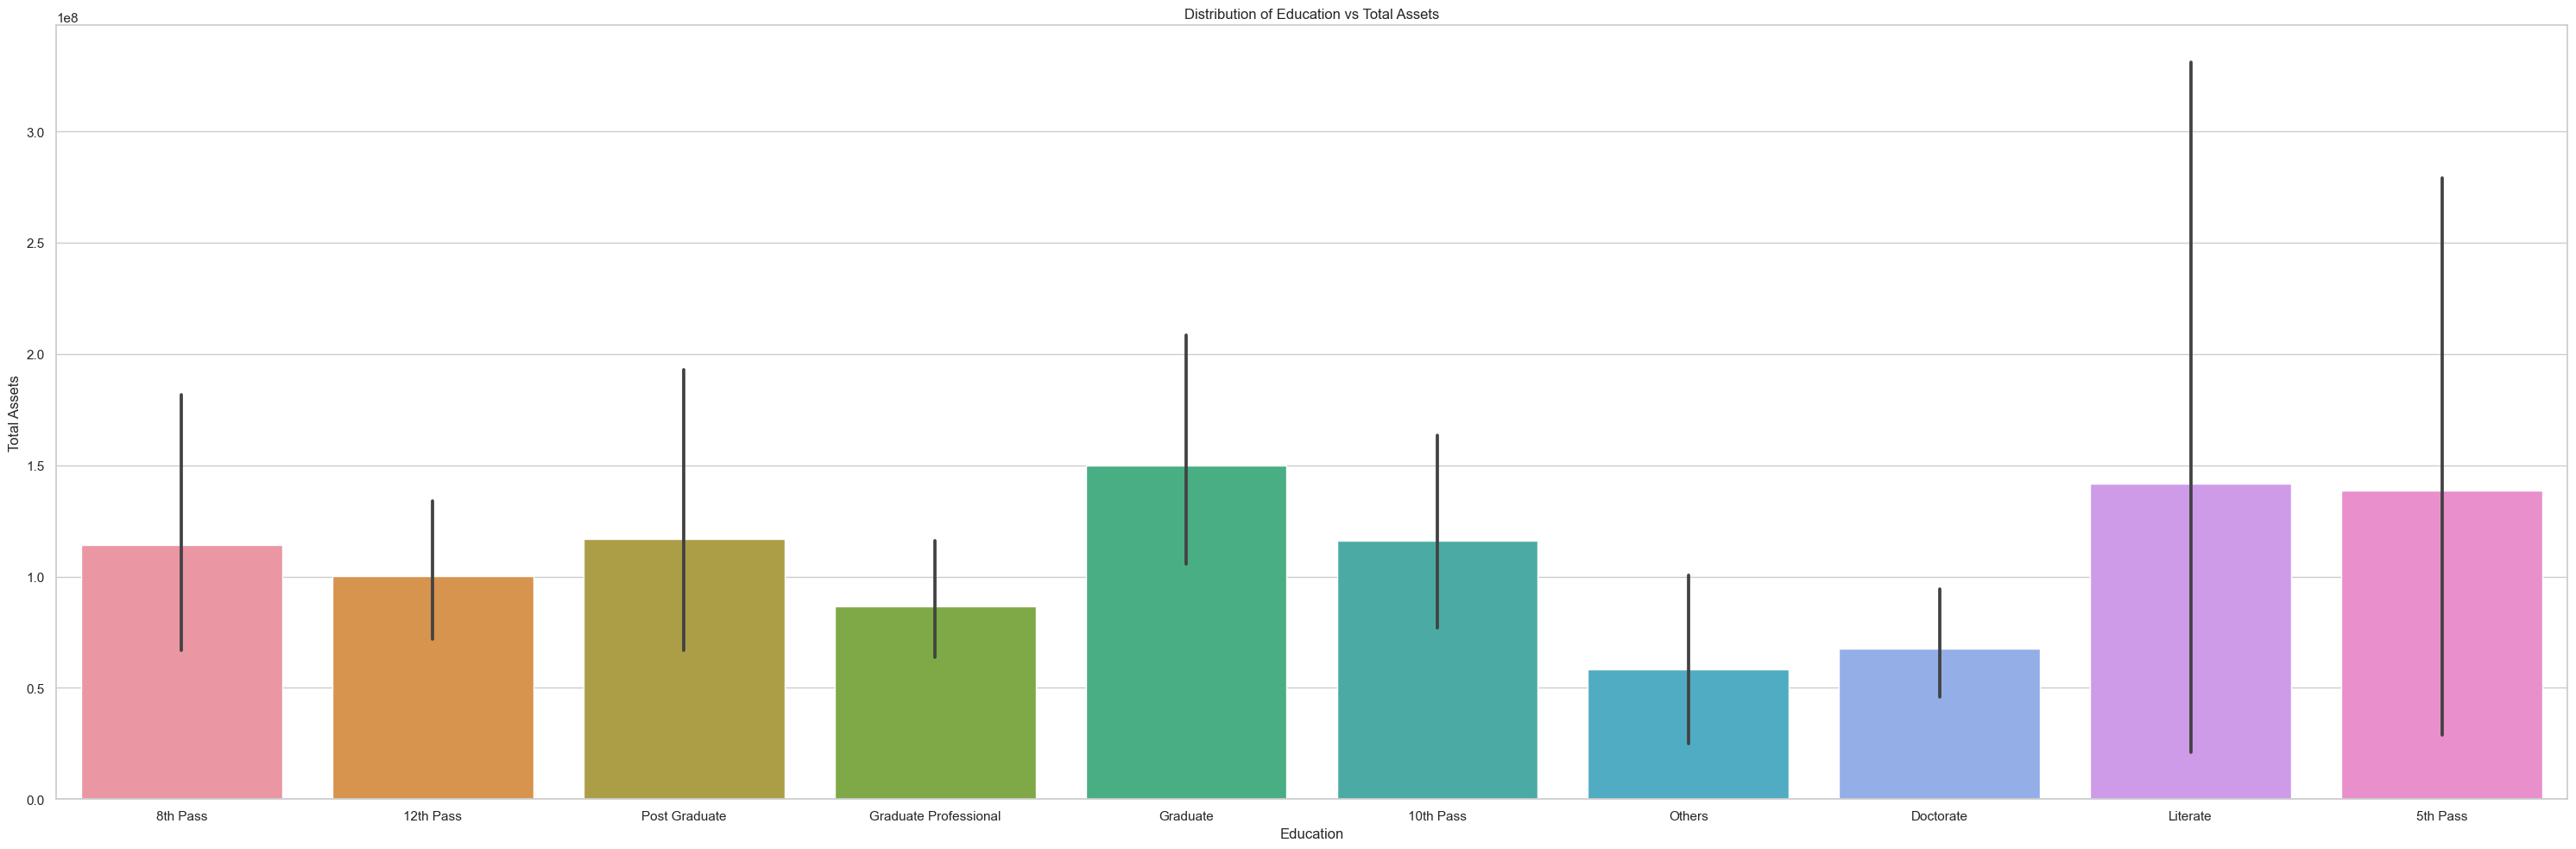

In [100]:
x=df['Education']
y=df['Total Assets']
plt.figure(figsize=(30,10))
sns.barplot(x=x,y=y)
plt.xlabel('Education')
plt.ylabel('Total Assets')
plt.title('Distribution of Education vs Total Assets')
plt.tight_layout()
plt.savefig('./Distribution of Education vs Total Assets barplot.jpg',format='jpeg')
plt.show()

### W.R.T. LIABILITIES

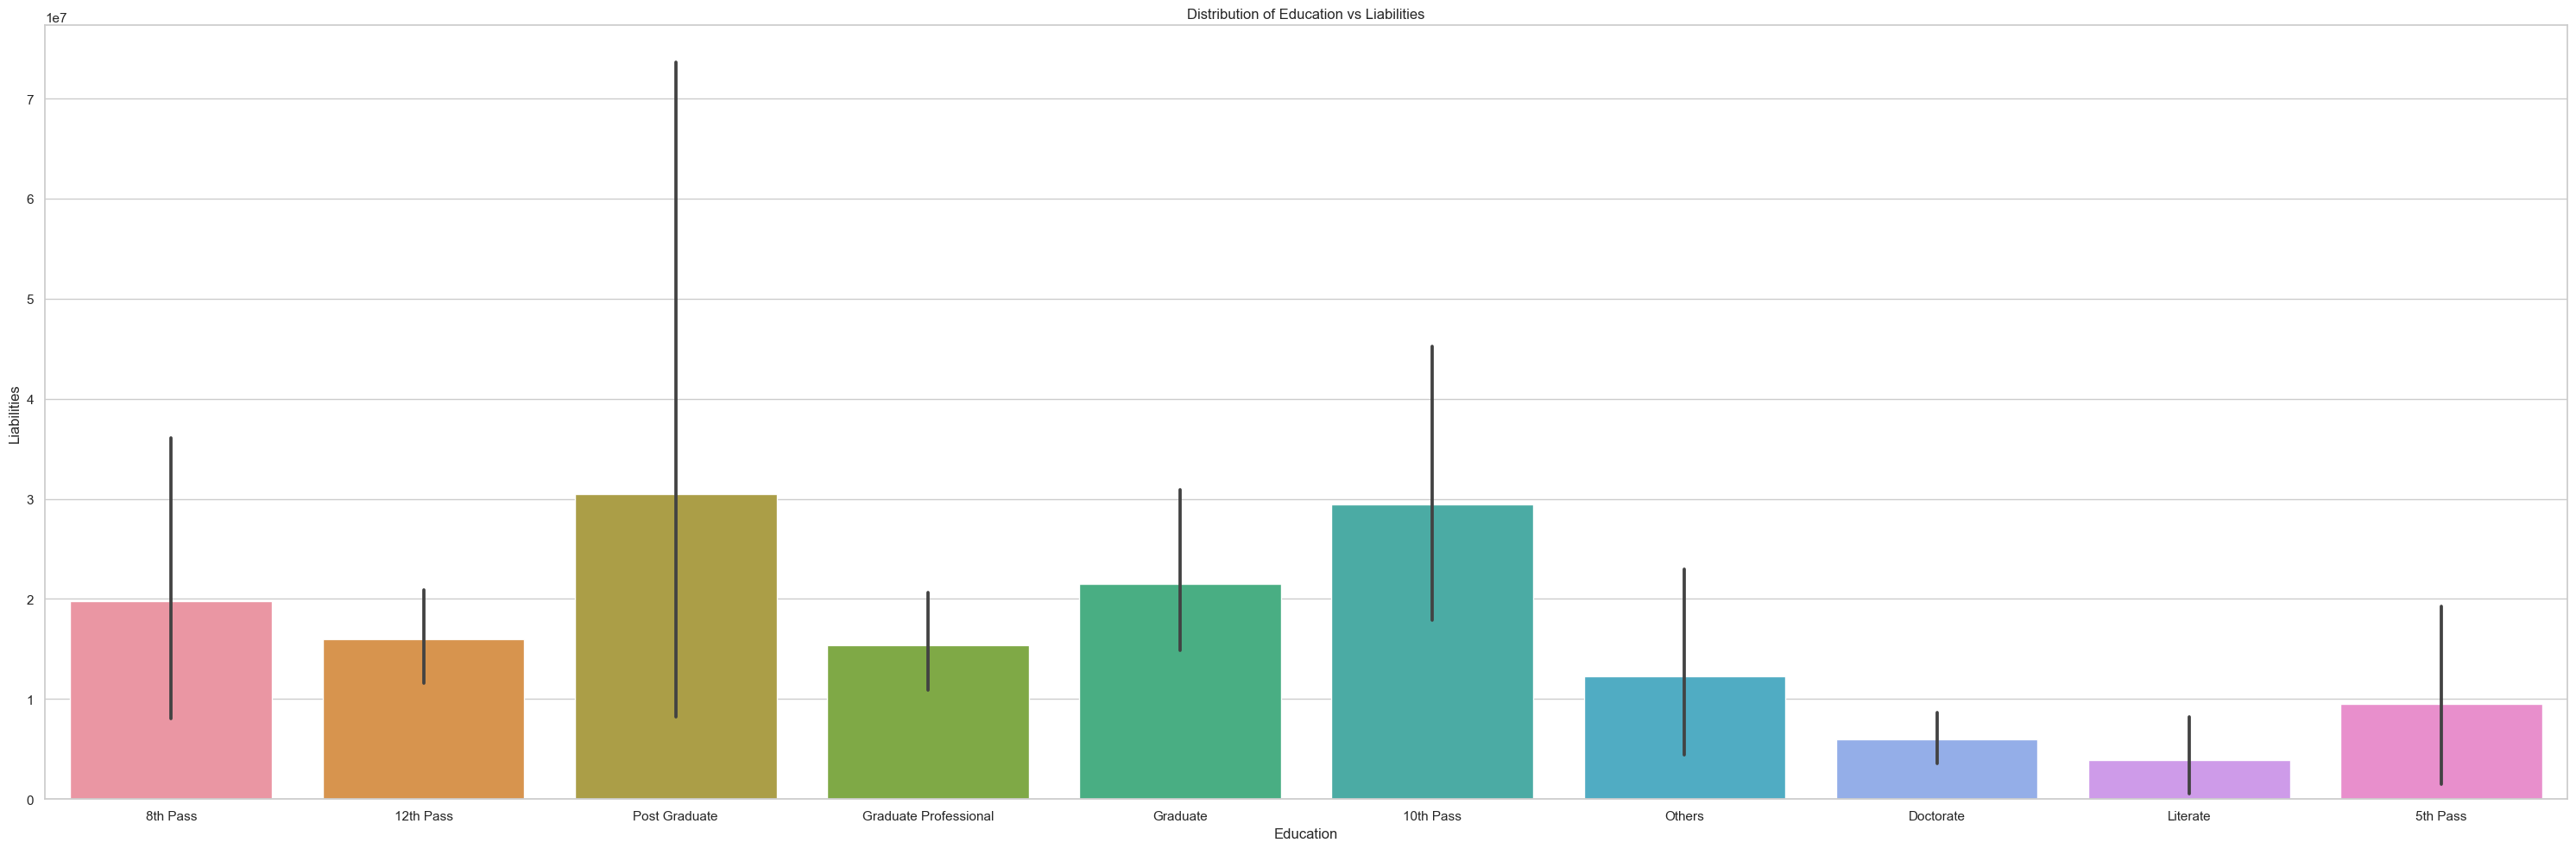

In [101]:
x=df['Education']
y=df['Liabilities']
plt.figure(figsize=(30,10))
sns.barplot(x=x,y=y)
plt.xlabel('Education')
plt.ylabel('Liabilities')
plt.title('Distribution of Education vs Liabilities')
plt.tight_layout()
plt.savefig('./Distribution of Education vs Liabilities barplot.jpg',format='jpeg')
plt.show()

### W.R.T. NET INCOME

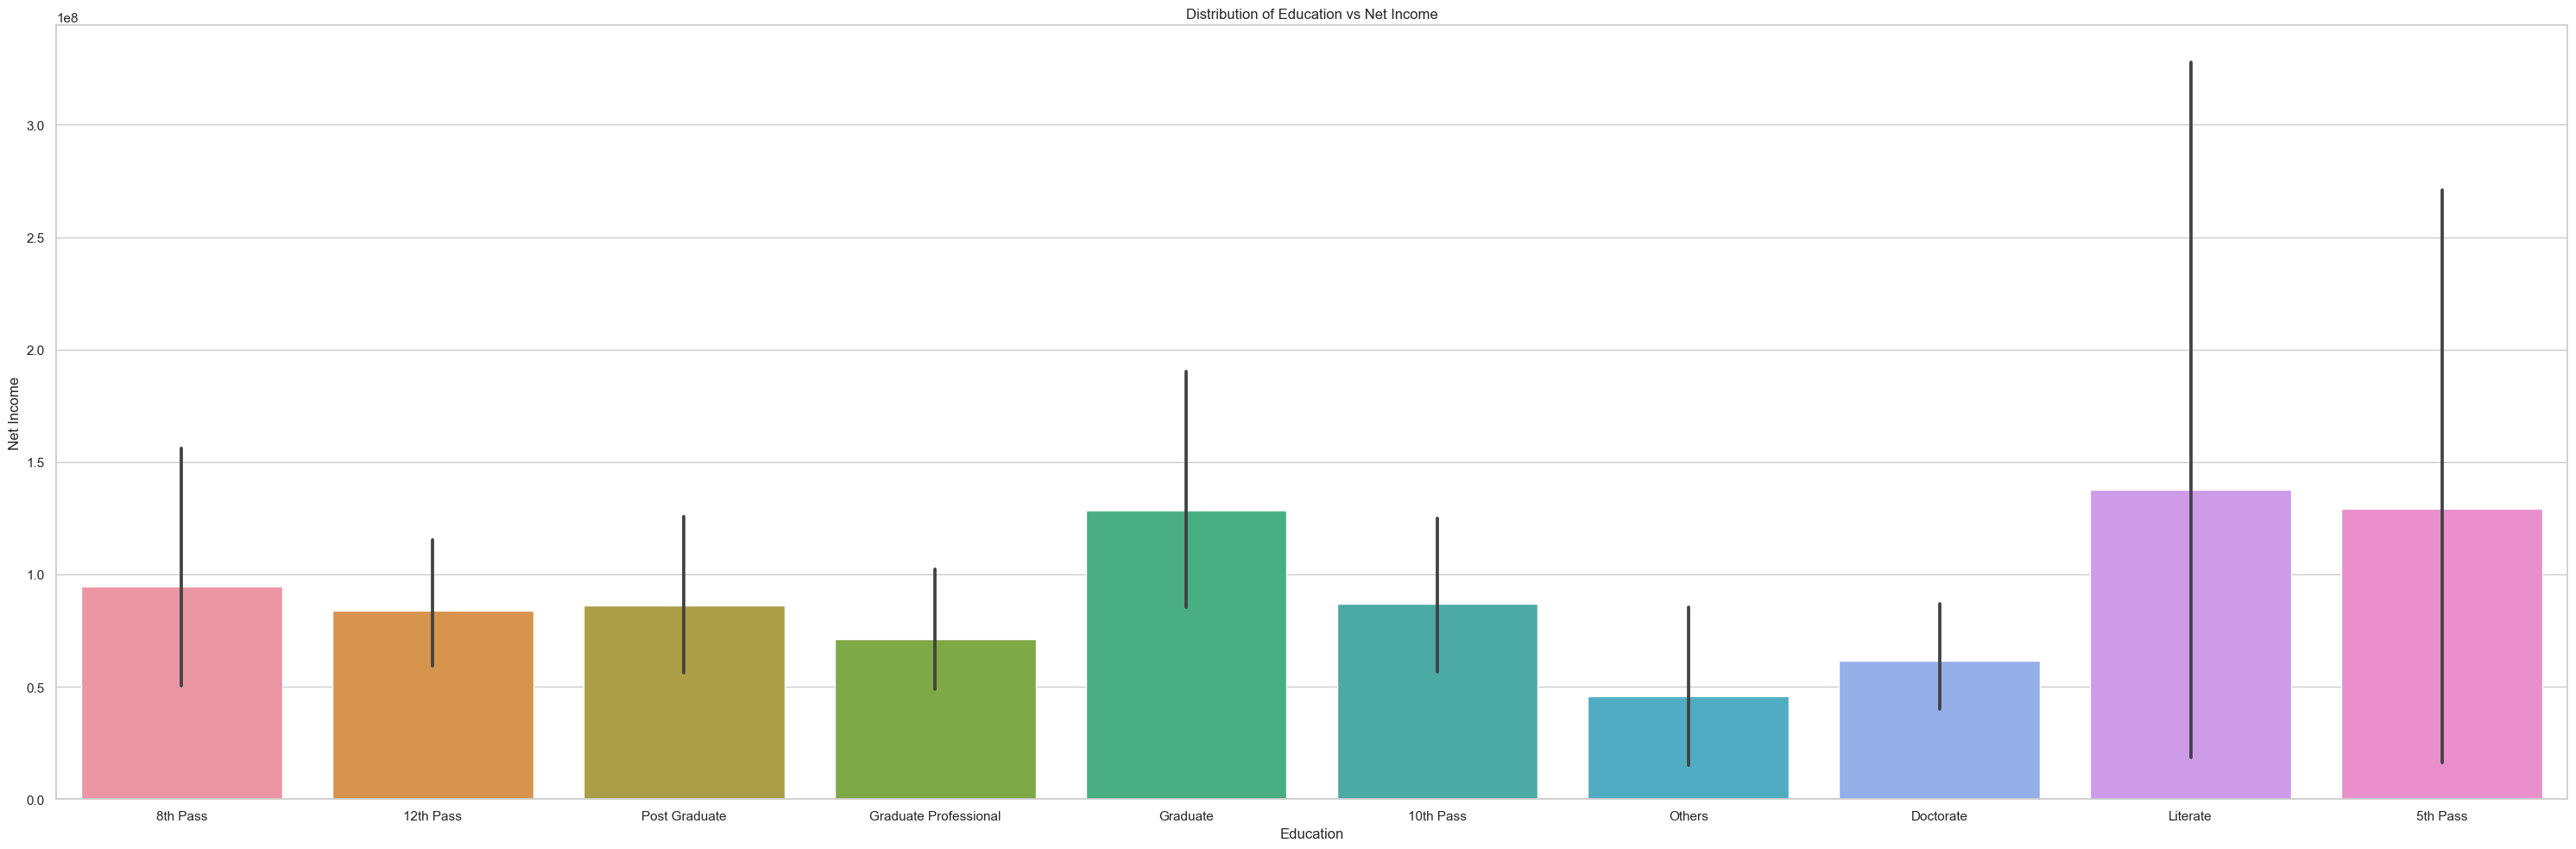

In [102]:
x=df['Education']
y=df['Net Income']
plt.figure(figsize=(30,10))
sns.barplot(x=x,y=y)
plt.xlabel('Education')
plt.ylabel('Net Income')
plt.title('Distribution of Education vs Net Income')
plt.tight_layout()
plt.savefig('./Distribution of Education vs Net Income barplot.jpg',format='jpeg')
plt.show()

### W.R.T. STATE

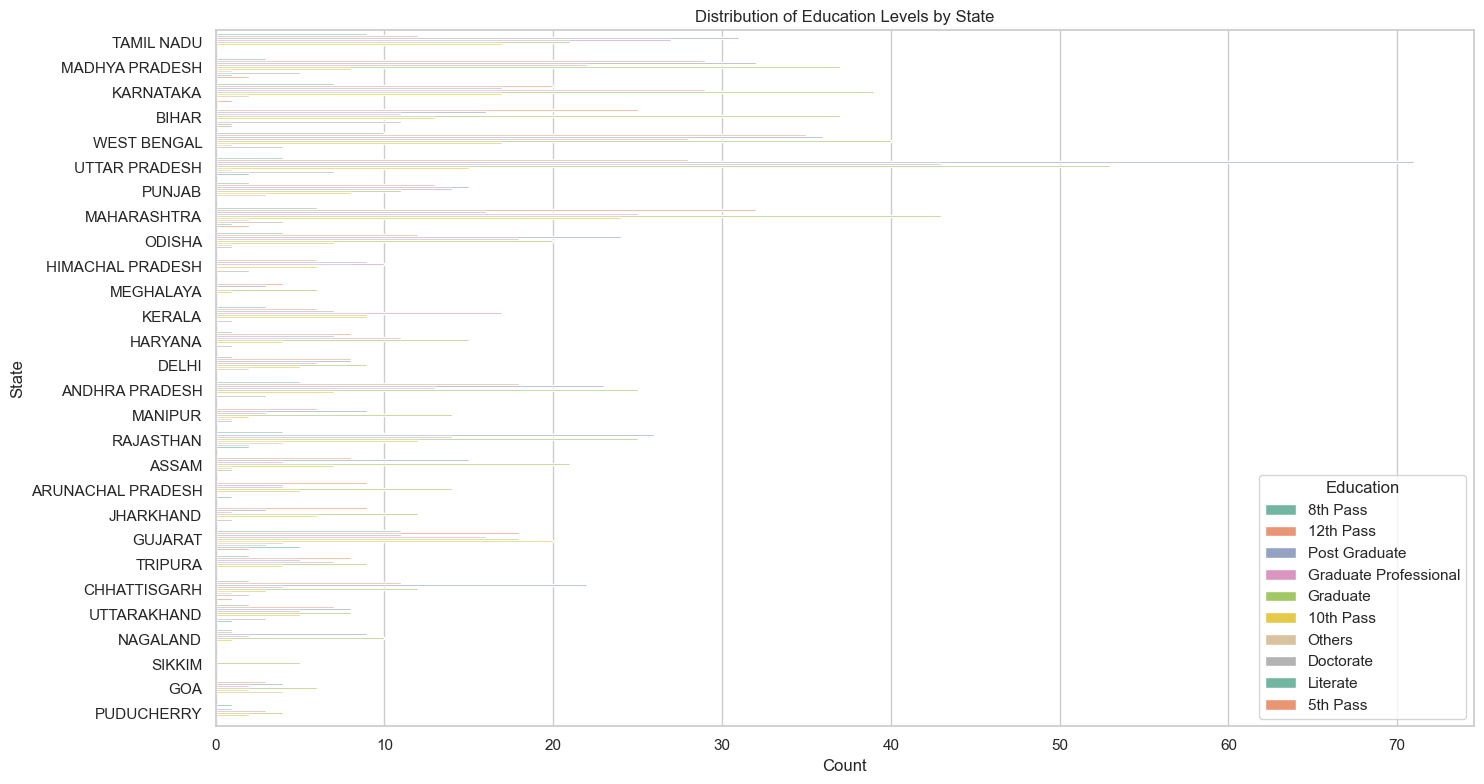

In [103]:
plt.figure(figsize=(15, 8))
sns.countplot(y='state', hue='Education', data=df, palette='Set2')
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Distribution of Education Levels by State')
plt.tight_layout()
plt.savefig('Distribution_of_Education_vs_State_countplot.jpg', format='jpeg')
plt.show()

### W.R.T. PARTY

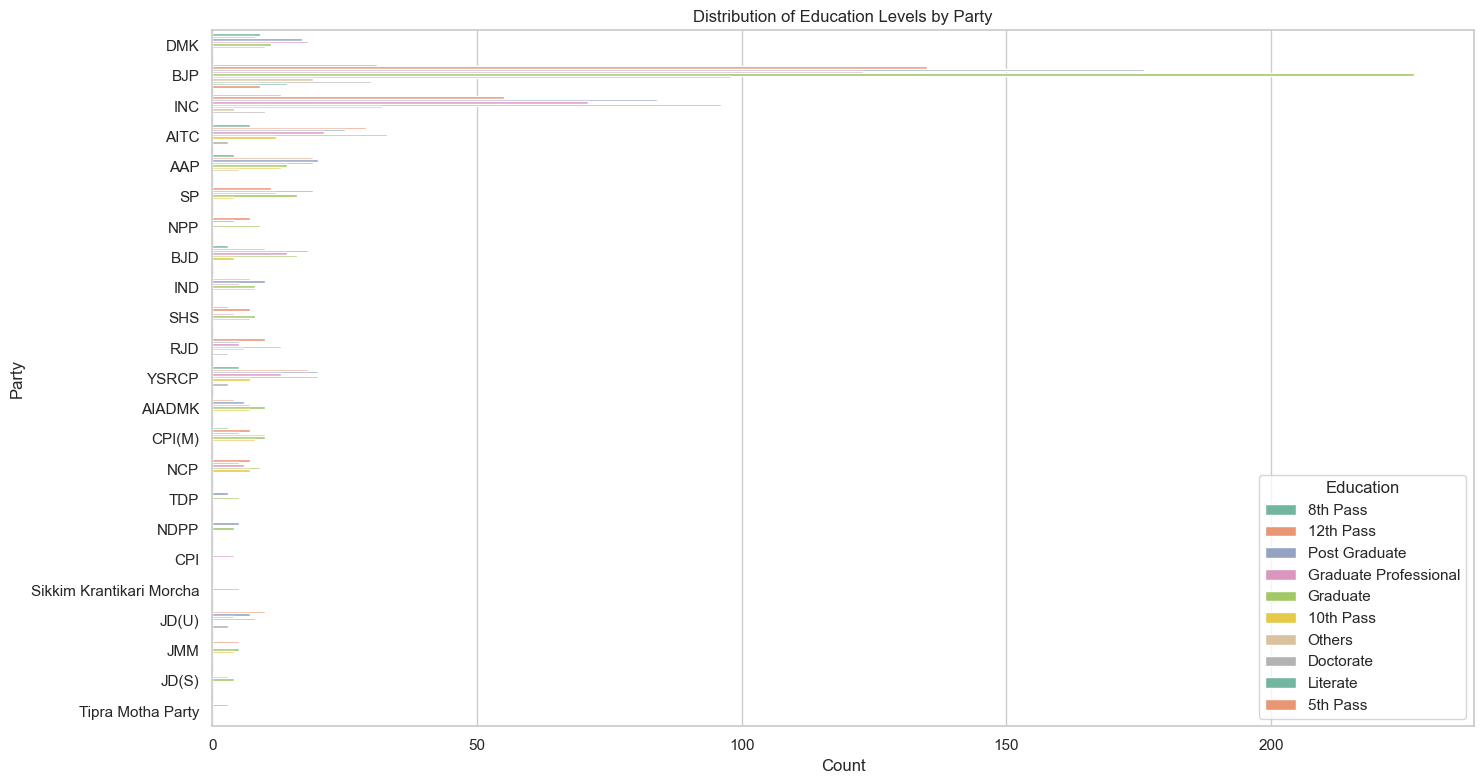

In [104]:
plt.figure(figsize=(15, 8))
sns.countplot(y='Party', hue='Education', data=df, palette='Set2')
plt.xlabel('Count')
plt.ylabel('Party')
plt.title('Distribution of Education Levels by Party')
plt.tight_layout()
plt.savefig('Distribution_of_Education_vs_Party_countplot.jpg', format='jpeg')
plt.show()